# Total Deaths 2020
### In this analysis, we will analyze the following:
* How different the number of deaths were in the United States for the years 2015 through 2020 and compare them.
* The total number of deaths per jurisdiction, per cause, per year.
* The deaths per capita rate per jurisdiction.
* If mask mandates helped reduce the deaths per jurisdiction.
* If travel restrictions helped reduce the deaths per jurisdiction.
* If gatherings banned helped reduce the deaths per jurisdiction.
* The jurisdiction severirty levels.

## Import libraries
We first need to import Python libraries that will be used with our data analyses and load in the deaths by jurisdiction and cause csv file.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import display
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

# Read in .csv file

In [2]:
data = pd.read_csv('Weekly_counts_of_death_by_jurisdiction_and_cause_of_death.csv', low_memory=False)
data

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Suppress,Note,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
1,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
2,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
3,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
4,Alabama,2017-01-07,AL,2017,1,Alzheimer disease and dementia,96.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329983,Wisconsin,2019-12-28,WI,2019,52,Respiratory diseases,23.0,Other diseases of the respiratory system,2015-2019,NaN,NaN,25,NaN,NaN,Unweighted
329984,Wisconsin,2020-12-26,WI,2020,52,Respiratory diseases,22.0,Other diseases of the respiratory system,2020,NaN,Data in recent weeks are incomplete. Only 60% ...,22,-3.0,-12.0,Predicted (weighted)
329985,Wisconsin,2020-12-26,WI,2020,52,Respiratory diseases,18.0,Other diseases of the respiratory system,2020,NaN,Data in recent weeks are incomplete. Only 60% ...,18,NaN,NaN,Unweighted
329986,Wisconsin,2021-01-02,WI,2020,53,Respiratory diseases,16.0,Other diseases of the respiratory system,2020,NaN,Data in recent weeks are incomplete. Only 60% ...,16,NaN,NaN,Predicted (weighted)


## Data cleanup
### Drop uneeded columns
Lets drop all of the columns that will not be needed in our data analyses. We are interested in Jurisdiction, Year, and Cause Group so we will drop every other column.

In [3]:
data.drop('Week Ending Date', axis = 1, inplace = True)
data.drop('State Abbreviation', axis = 1, inplace = True)
data.drop('Week', axis = 1, inplace = True)
data.drop('Cause Subgroup', axis = 1, inplace = True)
data.drop('Time Period', axis = 1, inplace = True)
data.drop('Suppress', axis = 1, inplace = True)
data.drop('Note', axis = 1, inplace = True)
data.drop('Average Number of Deaths in Time Period', axis = 1, inplace = True)
data.drop('Difference from 2015-2019 to 2020', axis = 1, inplace = True)
data.drop('Percent Difference from 2015-2019 to 2020', axis = 1, inplace = True)
data.drop('Type', axis = 1, inplace = True)

We will check for missing values and handle them.

In [4]:
data.isnull().sum()

Jurisdiction         0
Year                 0
Cause Group          0
Number of Deaths    34
dtype: int64

There are 34 null values in 'Number of Deaths' column. Lets look at these null values.

In [5]:
data[data.isna().any(axis=1)]

,Jurisdiction,Year,Cause Group,Number of Deaths
8100,Indiana,2020,Alzheimer disease and dementia,NaN
20454,North Carolina,2020,Alzheimer disease and dementia,NaN
20466,North Carolina,2020,Alzheimer disease and dementia,NaN
20478,North Carolina,2020,Alzheimer disease and dementia,NaN
38996,Indiana,2020,Circulatory diseases,NaN
50164,North Carolina,2020,Circulatory diseases,NaN
50176,North Carolina,2020,Circulatory diseases,NaN
65590,Indiana,2020,Circulatory diseases,NaN
74002,North Carolina,2020,Circulatory diseases,NaN
97552,North Carolina,2020,Circulatory diseases,NaN


All of these null values belong to three different jurisdictions, Indiana, North Carolina, and Connecticut. They are all also from the year 2020. Lets replace these null values with the mean from every year for every cause of death and check for null values again.

In [6]:
data["Number of Deaths"] = data.groupby(["Jurisdiction", "Year", "Cause Group"]).transform(lambda x: x.fillna(int(x.mean())))

In [7]:
data.isna().sum()

Jurisdiction        0
Year                0
Cause Group         0
Number of Deaths    0
dtype: int64

Lets check the data types.

In [8]:
data.dtypes

Jurisdiction         object
Year                  int64
Cause Group          object
Number of Deaths    float64
dtype: object

'Number of Deaths' is of type float and should be of type int so lets change it and check the data types again.

In [9]:
data = data.astype({'Number of Deaths':'int'})
data.dtypes

Jurisdiction        object
Year                 int64
Cause Group         object
Number of Deaths     int64
dtype: object

Lets check for strange values.

In [10]:
data.describe()

,Year,Number of Deaths
count,329988.000000,329988.000000
mean,2017.513279,157.654209
std,1.708681,682.281564
min,2015.000000,11.000000
25%,2016.000000,23.000000
50%,2018.000000,44.000000
75%,2019.000000,95.000000
max,2020.000000,12433.000000


Lets see how many rows have a jurisdiction that is 'United States'.

In [11]:
display(data[data['Jurisdiction'] == 'United States'].head())
display(data[data['Jurisdiction'] == 'United States'].count())

,Jurisdiction,Year,Cause Group,Number of Deaths
27072,United States,2015,Alzheimer disease and dementia,6187
27073,United States,2015,Alzheimer disease and dementia,6187
27074,United States,2016,Alzheimer disease and dementia,5155
27075,United States,2016,Alzheimer disease and dementia,5155
27076,United States,2017,Alzheimer disease and dementia,5844


Jurisdiction        8138
Year                8138
Cause Group         8138
Number of Deaths    8138
dtype: int64

There are 8138 rows that have 'United States' jurisdiction. We need specific jurisdictions so lets drop these rows and check if they are gone.

In [12]:
index = data[(data['Jurisdiction'] == 'United States')].index
data.drop(index, inplace = True)
display(data[data['Jurisdiction'] == 'United States'].count())

Jurisdiction        0
Year                0
Cause Group         0
Number of Deaths    0
dtype: int64

In [13]:
data.columns = ['Jurisdiction', 'Year', 'CauseGroup', 'NumberOfDeaths']
data.head()

,Jurisdiction,Year,CauseGroup,NumberOfDeaths
0,Alabama,2015,Alzheimer disease and dementia,120
1,Alabama,2015,Alzheimer disease and dementia,120
2,Alabama,2016,Alzheimer disease and dementia,76
3,Alabama,2016,Alzheimer disease and dementia,76
4,Alabama,2017,Alzheimer disease and dementia,96


Since the data looks good, we can now start analyzing the dataset.

## Dataset Analyses
###### Dataset: Weekly_counts_of_death_by_jurisdiction_and_cause_of_death analyses
### Seperate data by year
The data needs to be seperated by year so we can analyze deaths per year.

In [14]:
df_2015 = data[data.Year == 2015].reset_index(drop = True)
df_2016 = data[data.Year == 2016].reset_index(drop = True)
df_2017 = data[data.Year == 2017].reset_index(drop = True)
df_2018 = data[data.Year == 2018].reset_index(drop = True)
df_2019 = data[data.Year == 2019].reset_index(drop = True)
df_2020 = data[data.Year == 2020].reset_index(drop = True)

Lets sum the total number of deaths for all six years and total number of deaths per year.

In [15]:
totalDeaths_all = int(sum(data['NumberOfDeaths']))

sum_2015 = int(sum(df_2015['NumberOfDeaths']))
sum_2016 = int(sum(df_2016['NumberOfDeaths']))
sum_2017 = int(sum(df_2017['NumberOfDeaths']))
sum_2018 = int(sum(df_2018['NumberOfDeaths']))
sum_2019 = int(sum(df_2019['NumberOfDeaths']))
sum_2020 = int(sum(df_2020['NumberOfDeaths']))


We will now create a dataframe of years and deaths to analyze and compare and visualize it with a bar plot.

,Year,Deaths,Rate
0,2015,4169620,0.16115
1,2016,4185800,0.16178
2,2017,4301084,0.16623
3,2018,4343758,0.16788
4,2019,4341462,0.16779
5,2020,4531897,0.17516


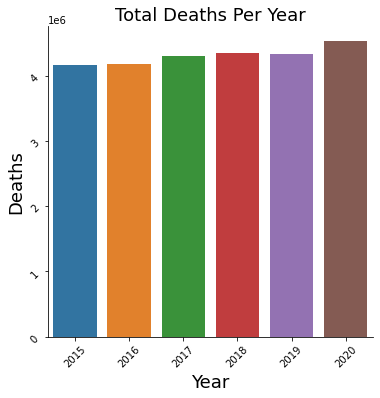

In [16]:
years = data['Year'].unique()

years_total = []
for year in years:
    years_total.append(str(year))
years_total.append('Total')

deaths = [sum_2015, sum_2016, sum_2017, sum_2018, sum_2019, sum_2020, totalDeaths_all]
rate = [round(sum_2015/totalDeaths_all, 5), round(sum_2016/totalDeaths_all, 5),
        round(sum_2017/totalDeaths_all, 5), round(sum_2018/totalDeaths_all, 5),
        round(sum_2019/totalDeaths_all, 5), round(sum_2020/totalDeaths_all, 5)]

rateSum = sum(rate)
rate.append(rateSum)

df_deaths = np.array([years_total, deaths, rate]).T
df_deaths = df_deaths.reshape(7,3)
df_deaths = pd.DataFrame(df_deaths)
df_deaths.columns = ['Year', 'Deaths', 'Rate']

df_ndeaths = df_deaths

df_ndeaths.drop(df_ndeaths.tail(1).index,inplace=True) # drop first n rows

df_ndeaths = df_ndeaths.astype({'Year':'int', 'Deaths':'int', 'Rate':'float'})

display(df_ndeaths)

sns.catplot(x = 'Year', y = 'Deaths', kind = 'bar', data = df_ndeaths)
plt.title("Total Deaths Per Year", size=18)
plt.xlabel("Year", size=18)
plt.ylabel("Deaths", size=18)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Deaths by cause and year
Lets analyze deaths by cause and year. We will seperate each year by cause, create a dataframe and plot the results.

,Year,Alzheimer,Malignant,Respiratory,Circulatory,Other,Total
0,2015,490130,1196044,520296,1649124,314026,4169620
1,2016,498712,1200410,512122,1658800,315756,4185800
2,2017,525012,1207174,539684,1702588,326626,4301084
3,2018,535206,1207218,547712,1722912,330710,4343758
4,2019,544754,1208100,523500,1733854,331254,4341462
5,2020,611881,1215007,521445,1822946,360618,4531897


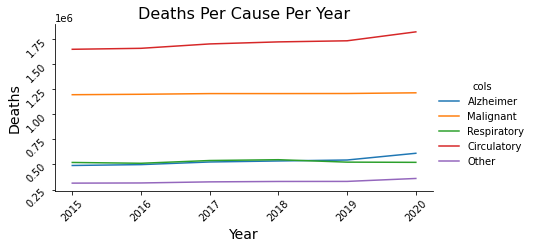

In [17]:
deathsAlzheimer_2015 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2015")['NumberOfDeaths'].sum())
deathsMalignant_2015 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2015")['NumberOfDeaths'].sum())
deathsRespiratory_2015 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2015")['NumberOfDeaths'].sum())
deathsCirculatory_2015 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2015")['NumberOfDeaths'].sum())
deathsOther_2015 = int(data.query("CauseGroup == 'Other select causes' and Year == 2015")['NumberOfDeaths'].sum())

deathsAlzheimer_2016 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2016")['NumberOfDeaths'].sum())
deathsMalignant_2016 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2016")['NumberOfDeaths'].sum())
deathsRespiratory_2016 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2016")['NumberOfDeaths'].sum())
deathsCirculatory_2016 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2016")['NumberOfDeaths'].sum())
deathsOther_2016 = int(data.query("CauseGroup == 'Other select causes' and Year == 2016")['NumberOfDeaths'].sum())

deathsAlzheimer_2017 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2017")['NumberOfDeaths'].sum())
deathsMalignant_2017 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2017")['NumberOfDeaths'].sum())
deathsRespiratory_2017 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2017")['NumberOfDeaths'].sum())
deathsCirculatory_2017 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2017")['NumberOfDeaths'].sum())
deathsOther_2017 = int(data.query("CauseGroup == 'Other select causes' and Year == 2017")['NumberOfDeaths'].sum())

deathsAlzheimer_2018 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2018")['NumberOfDeaths'].sum())
deathsMalignant_2018 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2018")['NumberOfDeaths'].sum())
deathsRespiratory_2018 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2018")['NumberOfDeaths'].sum())
deathsCirculatory_2018 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2018")['NumberOfDeaths'].sum())
deathsOther_2018 = int(data.query("CauseGroup == 'Other select causes' and Year == 2018")['NumberOfDeaths'].sum())

deathsAlzheimer_2019 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2019")['NumberOfDeaths'].sum())
deathsMalignant_2019 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2019")['NumberOfDeaths'].sum())
deathsRespiratory_2019 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2019")['NumberOfDeaths'].sum())
deathsCirculatory_2019 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2019")['NumberOfDeaths'].sum())
deathsOther_2019 = int(data.query("CauseGroup == 'Other select causes' and Year == 2019")['NumberOfDeaths'].sum())

deathsAlzheimer_2020 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2020")['NumberOfDeaths'].sum())
deathsMalignant_2020 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2020")['NumberOfDeaths'].sum())
deathsRespiratory_2020 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2020")['NumberOfDeaths'].sum())
deathsCirculatory_2020 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2020")['NumberOfDeaths'].sum())
deathsOther_2020 = int(data.query("CauseGroup == 'Other select causes' and Year == 2020")['NumberOfDeaths'].sum())

array_2015 = [2015, deathsAlzheimer_2015, deathsMalignant_2015, deathsRespiratory_2015, deathsCirculatory_2015, deathsOther_2015, sum_2015]
array_2016 = [2016, deathsAlzheimer_2016, deathsMalignant_2016, deathsRespiratory_2016, deathsCirculatory_2016, deathsOther_2016, sum_2016]
array_2017 = [2017, deathsAlzheimer_2017, deathsMalignant_2017, deathsRespiratory_2017, deathsCirculatory_2017, deathsOther_2017, sum_2017]
array_2018 = [2018, deathsAlzheimer_2018, deathsMalignant_2018, deathsRespiratory_2018, deathsCirculatory_2018, deathsOther_2018, sum_2018]
array_2019 = [2019, deathsAlzheimer_2019, deathsMalignant_2019, deathsRespiratory_2019, deathsCirculatory_2019, deathsOther_2019, sum_2019]
array_2020 = [2020, deathsAlzheimer_2020, deathsMalignant_2020, deathsRespiratory_2020, deathsCirculatory_2020, deathsOther_2020, sum_2020]

df_deathsCausePerYear = pd.DataFrame([array_2015, array_2016, array_2017, array_2018, array_2019, array_2020])

df_deathsCausePerYear.columns = ['Year', 'Alzheimer', 'Malignant', 'Respiratory', 'Circulatory', 'Other', 'Total']

display(df_deathsCausePerYear)

df_catPerYear = df_deathsCausePerYear.iloc[:,:-1]

df_catPerYear = df_catPerYear.melt('Year', var_name='cols', value_name='vals')

sns.relplot(x = 'Year', y = 'vals', hue = 'cols', kind = 'line', height=3, aspect=2, data = df_catPerYear)
plt.title("Deaths Per Cause Per Year", size=16)
plt.xlabel("Year", size=14)
plt.ylabel("Deaths", size=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()



From the results of Deaths Per Cause Per Year, we can see that the number of deaths increase every year in every cause except respiratory. Respiratory deaths are the only cause that the number of deaths decrease. We can visualize that circulatory deaths are the number one cause of deaths every year followed by malignant and then alzheimer and respiratory are about the same.

### Total deaths by cause
Now, lets analyze deaths by cause, create a dataframe and plot the results in a pie plot.

,Cause,Deaths,Rate
0,Circulatory,10290224,0.3977
1,Malignant,7233953,0.2796
2,Respiratory,3164759,0.1223
3,Alzheimer,3205695,0.1239
4,Other,1978990,0.0765


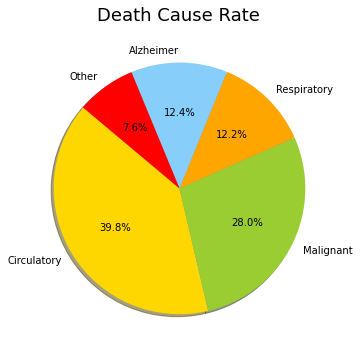

In [18]:
deaths_alzheimer = int(data.loc[data['CauseGroup'] == 'Alzheimer disease and dementia', 'NumberOfDeaths'].sum())
deaths_malignant = int(data.loc[data['CauseGroup'] == 'Malignant neoplasms', 'NumberOfDeaths'].sum())
deaths_respiratory = int(data.loc[data['CauseGroup'] == 'Respiratory diseases', 'NumberOfDeaths'].sum())
deaths_circulatory = int(data.loc[data['CauseGroup'] == 'Circulatory diseases', 'NumberOfDeaths'].sum())
deaths_other = int(data.loc[data['CauseGroup'] == 'Other select causes', 'NumberOfDeaths'].sum())

array_circulatory = ['Circulatory', deaths_circulatory, round(deaths_circulatory/totalDeaths_all, 4)]
array_malignant = ['Malignant', deaths_malignant, round(deaths_malignant/totalDeaths_all, 4)]
array_respiratory = ['Respiratory', deaths_respiratory, round(deaths_respiratory/totalDeaths_all, 4)]
array_alzheimer = ['Alzheimer', deaths_alzheimer, round(deaths_alzheimer/totalDeaths_all, 4)]
array_other = ['Other', deaths_other, round(deaths_other/totalDeaths_all, 4)]

df_cause = pd.DataFrame([array_circulatory, array_malignant, array_respiratory, array_alzheimer, array_other])

df_cause.columns = ['Cause', 'Deaths', 'Rate']

display(df_cause)

fig, ax = plt.subplots(figsize = (5, 6), subplot_kw = dict(aspect = "equal"))

labels = df_cause['Cause']
sizes = df_cause['Rate']
colors = ['gold', 'yellowgreen', 'orange', 'lightskyblue', 'red']
# Plot
plt.pie(sizes, labels = labels, colors = colors,
autopct='%1.1f%%', shadow = True, startangle=140)

plt.axis('equal')
plt.title('Death Cause Rate', size=18)
plt.show()

The pie plot above shows the total percentage of deaths per cause for years 2015-2020. The visualization of the pie plot also shows circulatory deaths as the number one cause of deaths at 39.8% and malignant deaths at 28.0% which with both of these together adds up to almost 70%.

### Death rate by cause and year

In [19]:
rateCause_2015 = ['2015', round(deathsAlzheimer_2015/sum_2015, 4), round(deathsMalignant_2015/sum_2015, 4),
                  round(deathsRespiratory_2015/sum_2015, 4), round(deathsCirculatory_2015/sum_2015, 4),
                  round(deathsOther_2015/sum_2015, 4)]
rateCause_2016 = ['2016', round(deathsAlzheimer_2016/sum_2016, 4), round(deathsMalignant_2016/sum_2016, 4),
                  round(deathsRespiratory_2016/sum_2016, 4), round(deathsCirculatory_2016/sum_2016, 4),
                  round(deathsOther_2016/sum_2016, 4)]
rateCause_2017 = ['2017', round(deathsAlzheimer_2017/sum_2017, 4), round(deathsMalignant_2017/sum_2017, 4),
                  round(deathsRespiratory_2017/sum_2017, 4), round(deathsCirculatory_2017/sum_2017, 4),
                  round(deathsOther_2017/sum_2017, 4)]
rateCause_2018 = ['2018', round(deathsAlzheimer_2018/sum_2018, 4), round(deathsMalignant_2018/sum_2018, 4),
                  round(deathsRespiratory_2018/sum_2018, 4), round(deathsCirculatory_2018/sum_2018, 4),
                  round(deathsOther_2018/sum_2018, 4)]
rateCause_2019 = ['2019', round(deathsAlzheimer_2019/sum_2019, 4), round(deathsMalignant_2019/sum_2019, 4),
                  round(deathsRespiratory_2019/sum_2019, 4), round(deathsCirculatory_2019/sum_2019, 4),
                  round(deathsOther_2019/sum_2019, 4)]
rateCause_2020 = ['2020', round(deathsAlzheimer_2020/sum_2020, 4), round(deathsMalignant_2020/sum_2020, 4),
                  round(deathsRespiratory_2020/sum_2020, 4), round(deathsCirculatory_2020/sum_2020, 4),
                  round(deathsOther_2020/sum_2020, 4)]

df_rateCause = pd.DataFrame([rateCause_2015, rateCause_2016, rateCause_2017, rateCause_2018, rateCause_2019, rateCause_2020])
df_rateCause.columns = ['Year', 'Alzheimer', 'Malignant', 'Respiratory', 'Circulatory', 'Other']

display(df_rateCause)


,Year,Alzheimer,Malignant,Respiratory,Circulatory,Other
0,2015,0.1175,0.2868,0.1248,0.3955,0.0753
1,2016,0.1191,0.2868,0.1223,0.3963,0.0754
2,2017,0.1221,0.2807,0.1255,0.3959,0.0759
3,2018,0.1232,0.2779,0.1261,0.3966,0.0761
4,2019,0.1255,0.2783,0.1206,0.3994,0.0763
5,2020,0.1350,0.2681,0.1151,0.4022,0.0796


### Death trends per cause
Lets analyze the death trends per cause and plot them seperately.

,Circulatory
Year,
2015,1649124
2016,1658800
2017,1702588
2018,1722912
2019,1733854
2020,1822946


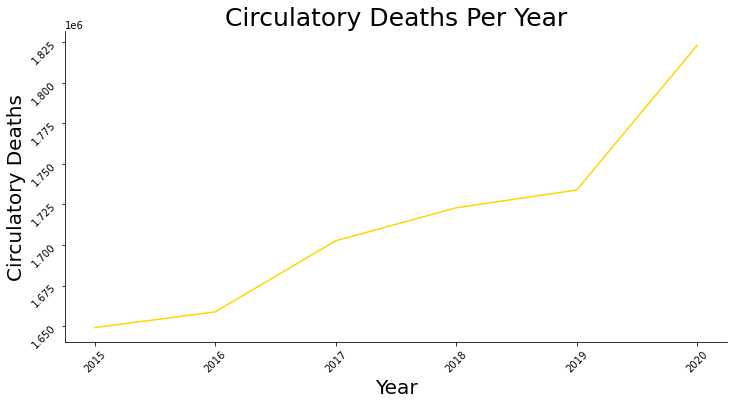

,Malignant
Year,
2015,1196044
2016,1200410
2017,1207174
2018,1207218
2019,1208100
2020,1215007


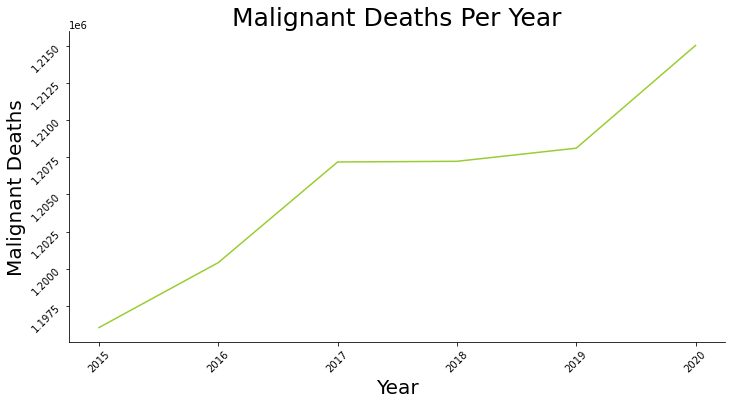

,Respiratory
Year,
2015,520296
2016,512122
2017,539684
2018,547712
2019,523500
2020,521445


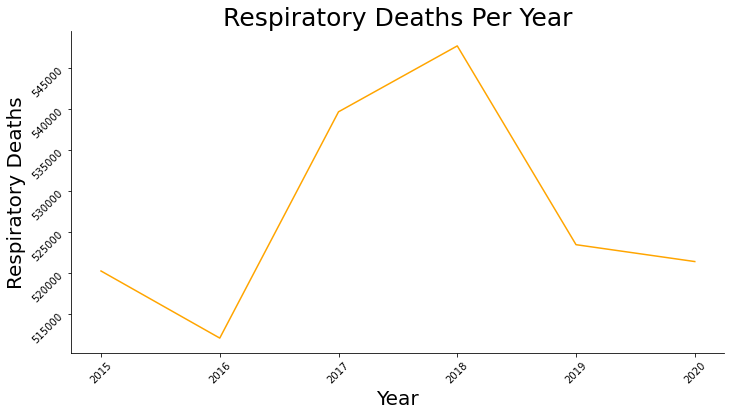

,Alzheimer
Year,
2015,490130
2016,498712
2017,525012
2018,535206
2019,544754
2020,611881


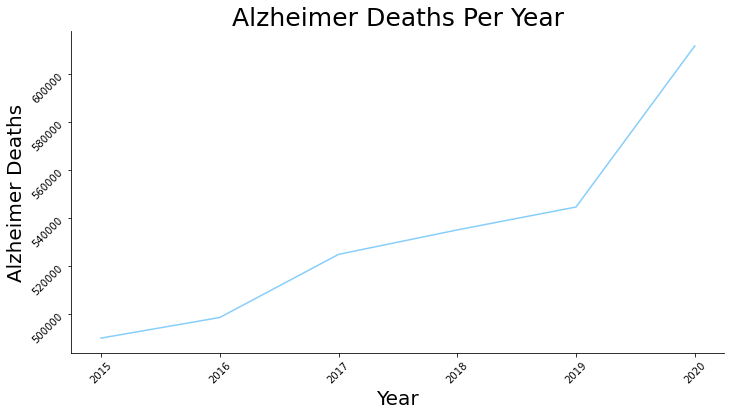

,Other
Year,
2015,314026
2016,315756
2017,326626
2018,330710
2019,331254
2020,360618


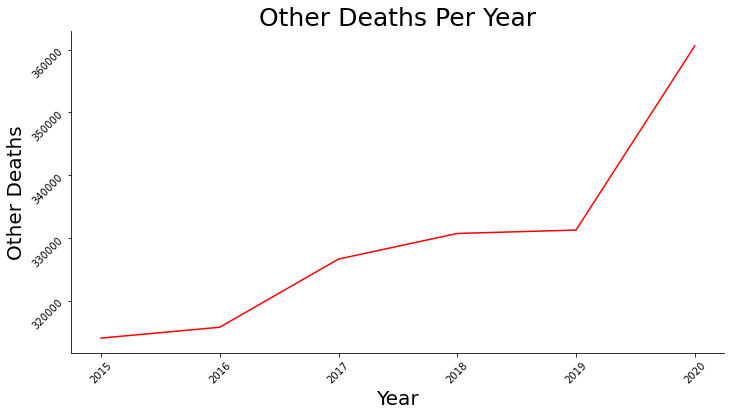

In [20]:
data_circulatory = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Circulatory']])
data_circulatory = data_circulatory.transpose().set_index('Year')
display(data_circulatory)
# Draw Plot
sns.relplot(x=data_circulatory.index, y='Circulatory', kind='line', height=5, aspect=2, color='gold', data=data_circulatory)
plt.title("Circulatory Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Circulatory Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_malignant = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Malignant']])
data_malignant = data_malignant.transpose().set_index('Year')
display(data_malignant)
# Draw Plot
sns.relplot(x=data_malignant.index, y='Malignant', kind = 'line', height=5, aspect=2, color='yellowgreen', data=data_malignant)
plt.title("Malignant Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Malignant Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_respiratory = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Respiratory']])
data_respiratory = data_respiratory.transpose().set_index('Year')
display(data_respiratory)
# Draw Plot
sns.relplot(x=data_respiratory.index, y='Respiratory', kind = 'line', height=5, aspect=2, color='orange', data=data_respiratory)
plt.title("Respiratory Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Respiratory Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_alzheimer = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Alzheimer']])
data_alzheimer = data_alzheimer.transpose().set_index('Year')
display(data_alzheimer)
# Draw Plot
sns.relplot(x=data_alzheimer.index, y='Alzheimer', kind = 'line', height=5, aspect=2, color='lightskyblue', data=data_alzheimer)
plt.title("Alzheimer Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Alzheimer Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_other = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Other']])
data_other = data_other.transpose().set_index('Year')
display(data_other)
# Draw Plot
sns.relplot(x=data_other.index, y='Other', kind = 'line', height=5, aspect=2, color='red', data=data_other)
plt.title("Other Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Other Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


According to the visualizations above, you can see the death trends of every category increase every year except respiratory. This is interesting because in the year 2020, most of the country had lockdown restrictions for the COVID-19 pandemic.

### Total deaths by year and jurisdiction
Lets use Pandas groupby function to get the total deaths by year and jurisdiction.

In [21]:
yearJurisdiction_df = data.groupby(['Year', 'Jurisdiction']).sum()
yearJurisdiction_df


NumberOfDeaths
Year Jurisdiction                 
2015 Alabama                 77032
     Alaska                   2254
     Arizona                 79724
     Arkansas                47900
     California             411494
...                            ...
2020 Virginia               113637
     Washington              87051
     West Virginia           29333
     Wisconsin               84521
     Wyoming                  3360

[318 rows x 1 columns]

### Total deaths by jurisdiction
Now, lets get the total deaths by jurisdiction for all 6 years without the year and sort them. We will drop year index.

In [22]:
jurisdiction_deaths = data.groupby('Jurisdiction', as_index=False).sum()
jurisdiction_deaths.drop('Year', axis = 1, inplace = True)
display(jurisdiction_deaths.head())

jurisdiction_deaths_sorted = jurisdiction_deaths.sort_values('NumberOfDeaths', ascending=False).reset_index(drop=True)
display(jurisdiction_deaths_sorted.head())

,Jurisdiction,NumberOfDeaths
0,Alabama,492182
1,Alaska,13654
2,Arizona,518901
3,Arkansas,296365
4,California,2548245


,Jurisdiction,NumberOfDeaths
0,California,2548245
1,Florida,1908728
2,Texas,1861608
3,Pennsylvania,1259968
4,Ohio,1142658


Lets plot the results in a line plot. We will plot the top 10 and then the bottom 10.

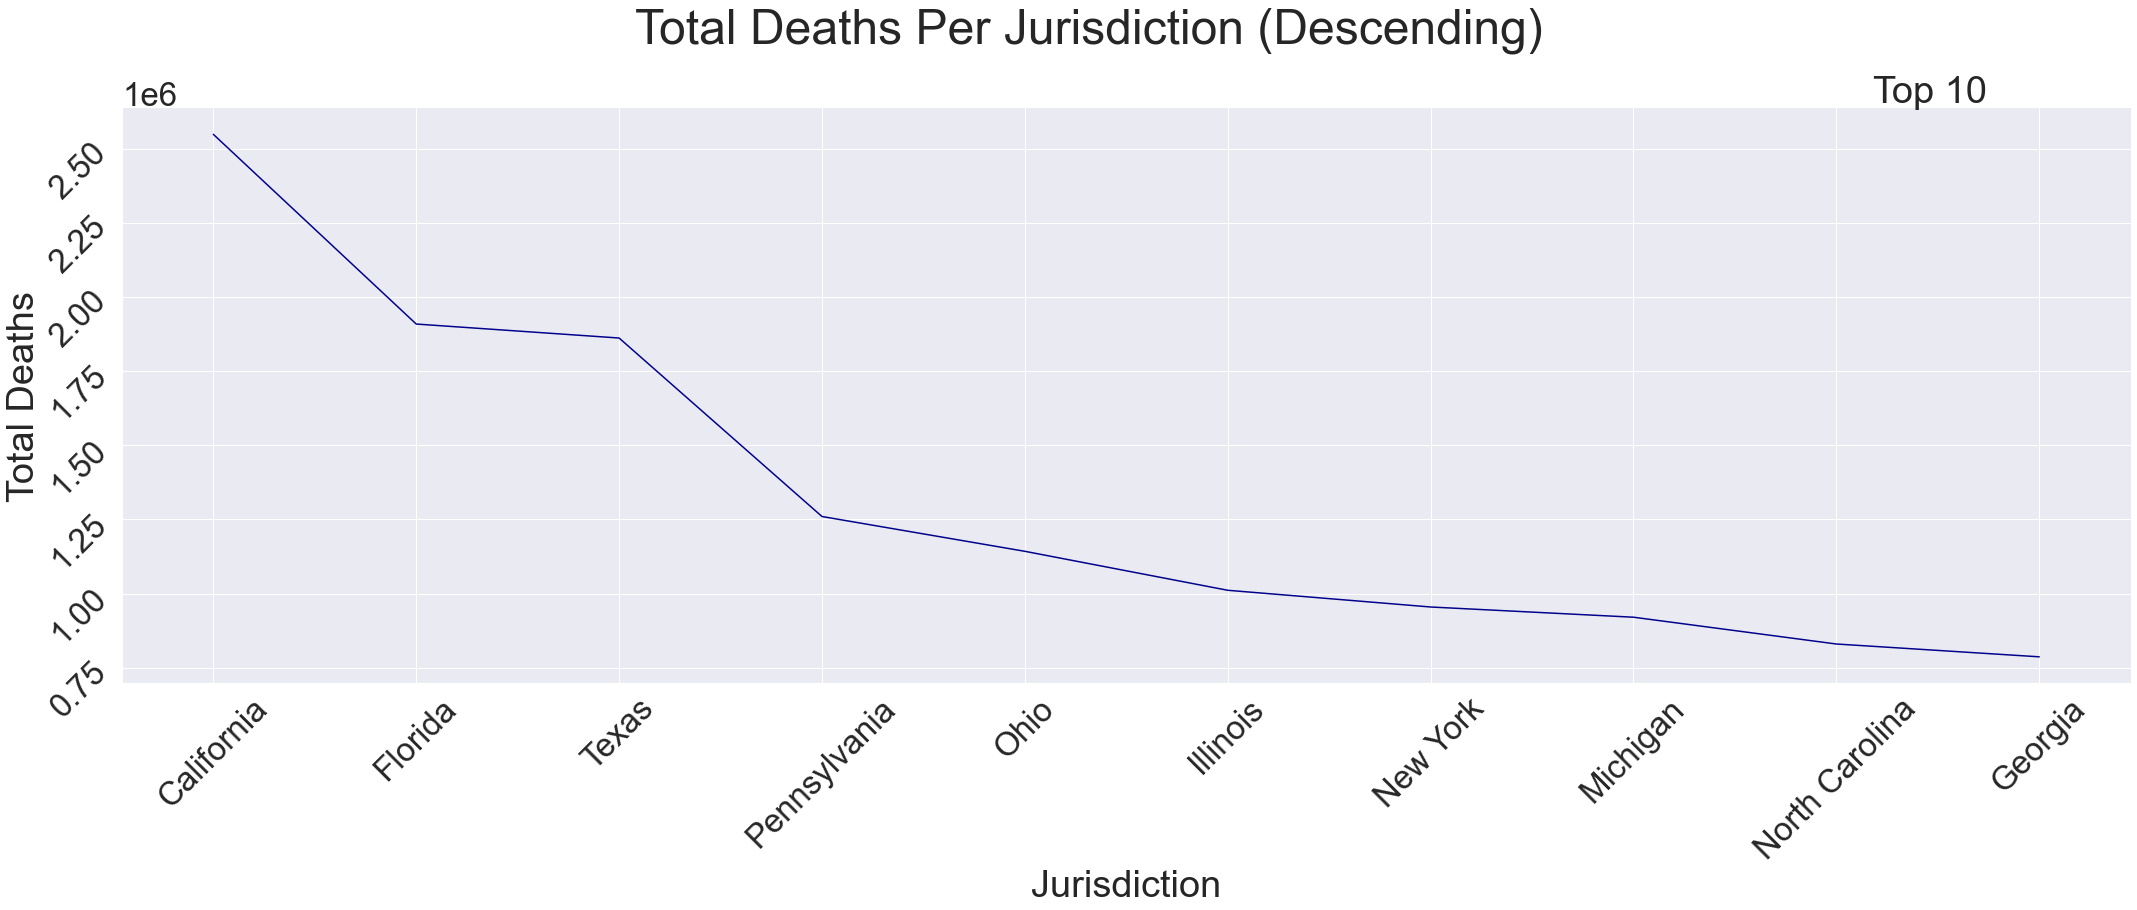

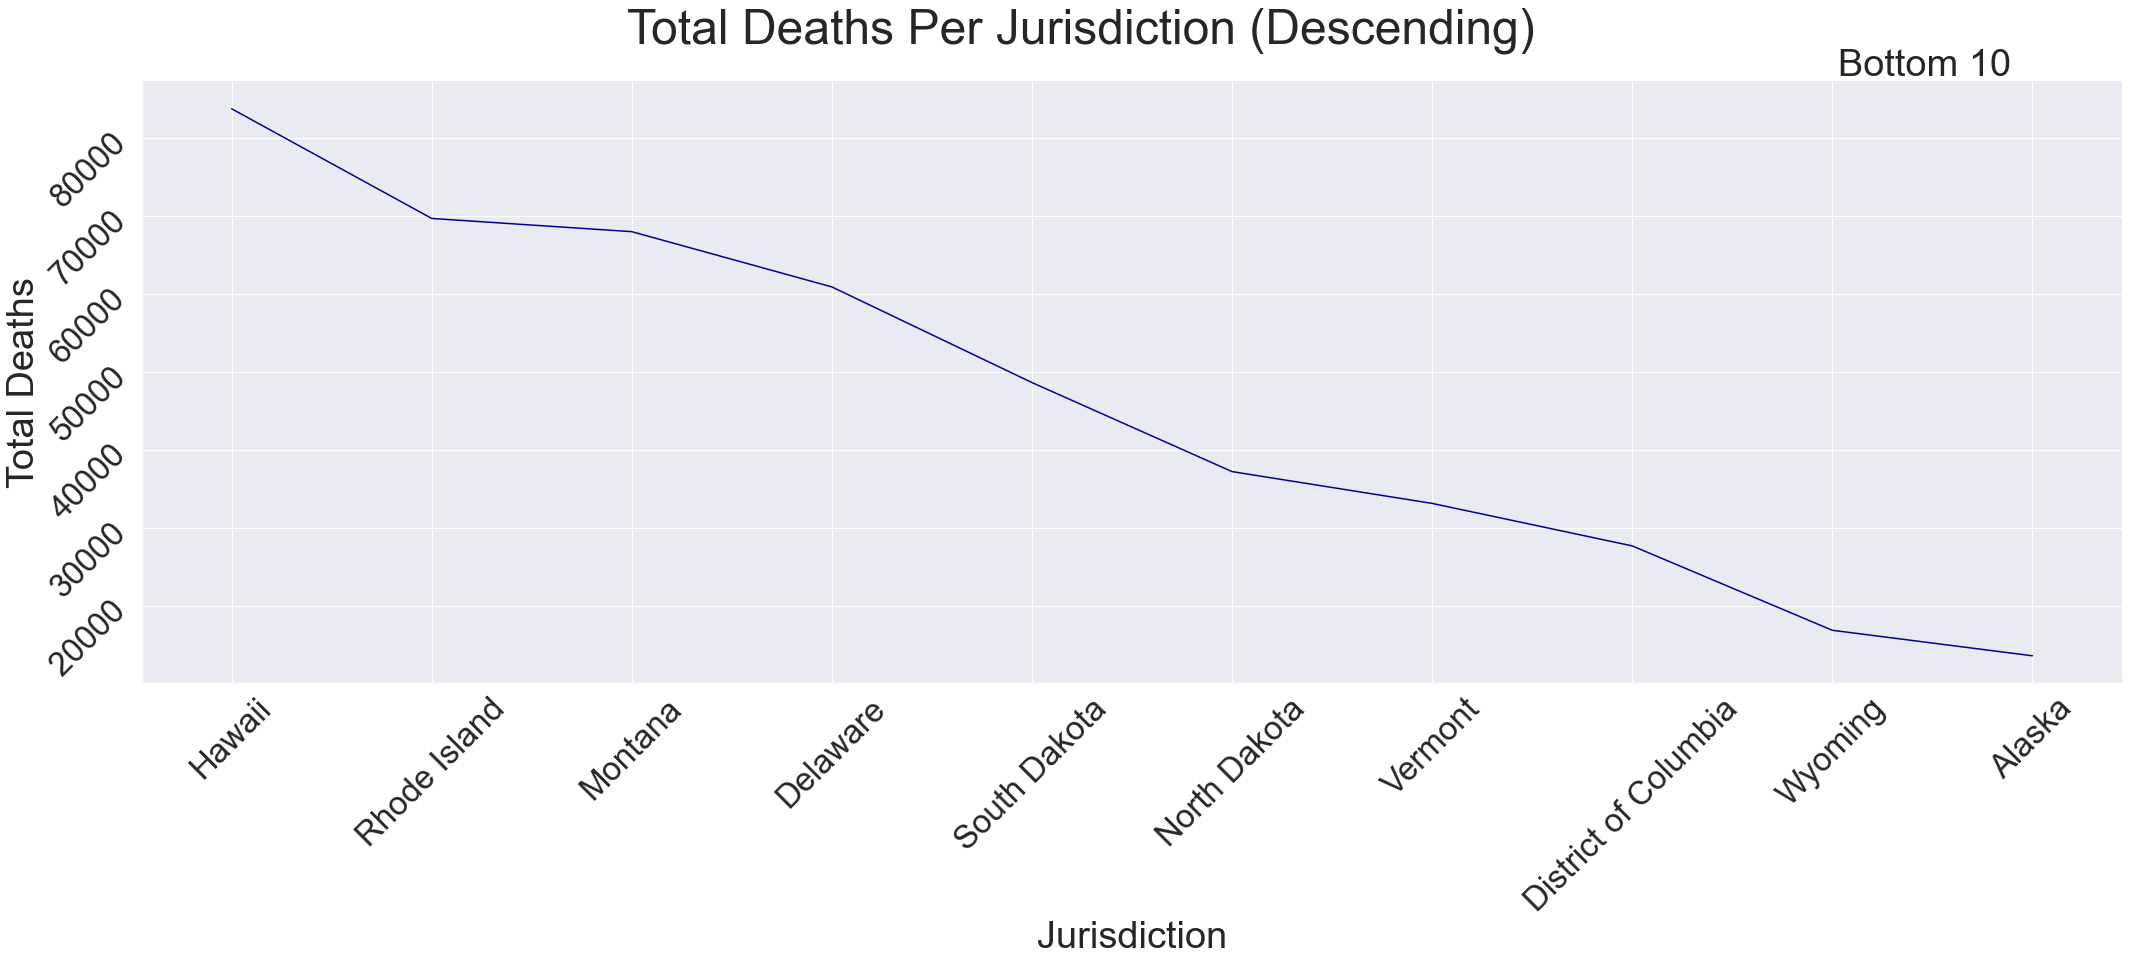

In [23]:
sns.set(font_scale = 3)
sns.relplot(x='Jurisdiction', y='NumberOfDeaths', kind = 'line', height=10, aspect=3, color='darkblue', data=jurisdiction_deaths_sorted.head(10))
plt.suptitle("Total Deaths Per Jurisdiction (Descending)", size=48, y=1.05)
plt.title("Top 10", size=38, x=0.9)
plt.xlabel("Jurisdiction", size=38)
plt.ylabel("Total Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

sns.set(font_scale = 3)
sns.relplot(x='Jurisdiction', y='NumberOfDeaths', kind = 'line', height=10, aspect=3, color='darkblue', data=jurisdiction_deaths_sorted.tail(10))
plt.suptitle("Total Deaths Per Jurisdiction (Descending)", size=48, y=1.05)
plt.title("Bottom 10", size=38, x=0.9)
plt.xlabel("Jurisdiction", size=38)
plt.ylabel("Total Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### 2020 deaths by jurisdiction sorted from most to least
Now, lets sort the deaths from most to least for the year 2020.

In [24]:
jurisdiction_deaths2020_sorted = yearJurisdiction_df.copy()
jurisdiction_deaths2020_sorted = jurisdiction_deaths2020_sorted.loc[(2020)].sort_values('NumberOfDeaths', ascending=False).reset_index()

# Display the head
display(jurisdiction_deaths2020_sorted.head())

# Display the tail.
display(jurisdiction_deaths2020_sorted.tail())

,Jurisdiction,NumberOfDeaths
0,California,449439
1,Florida,342518
2,Texas,335766
3,Pennsylvania,214464
4,Ohio,198922


,Jurisdiction,NumberOfDeaths
48,North Dakota,6432
49,Vermont,6083
50,District of Columbia,4480
51,Wyoming,3360
52,Alaska,2380


## Plot the Results

Lets plot the results for the year 2020 from most deaths to least deaths in 2 seperate plots. First, we will plot the top 10 and then we will plot the bottom 10.

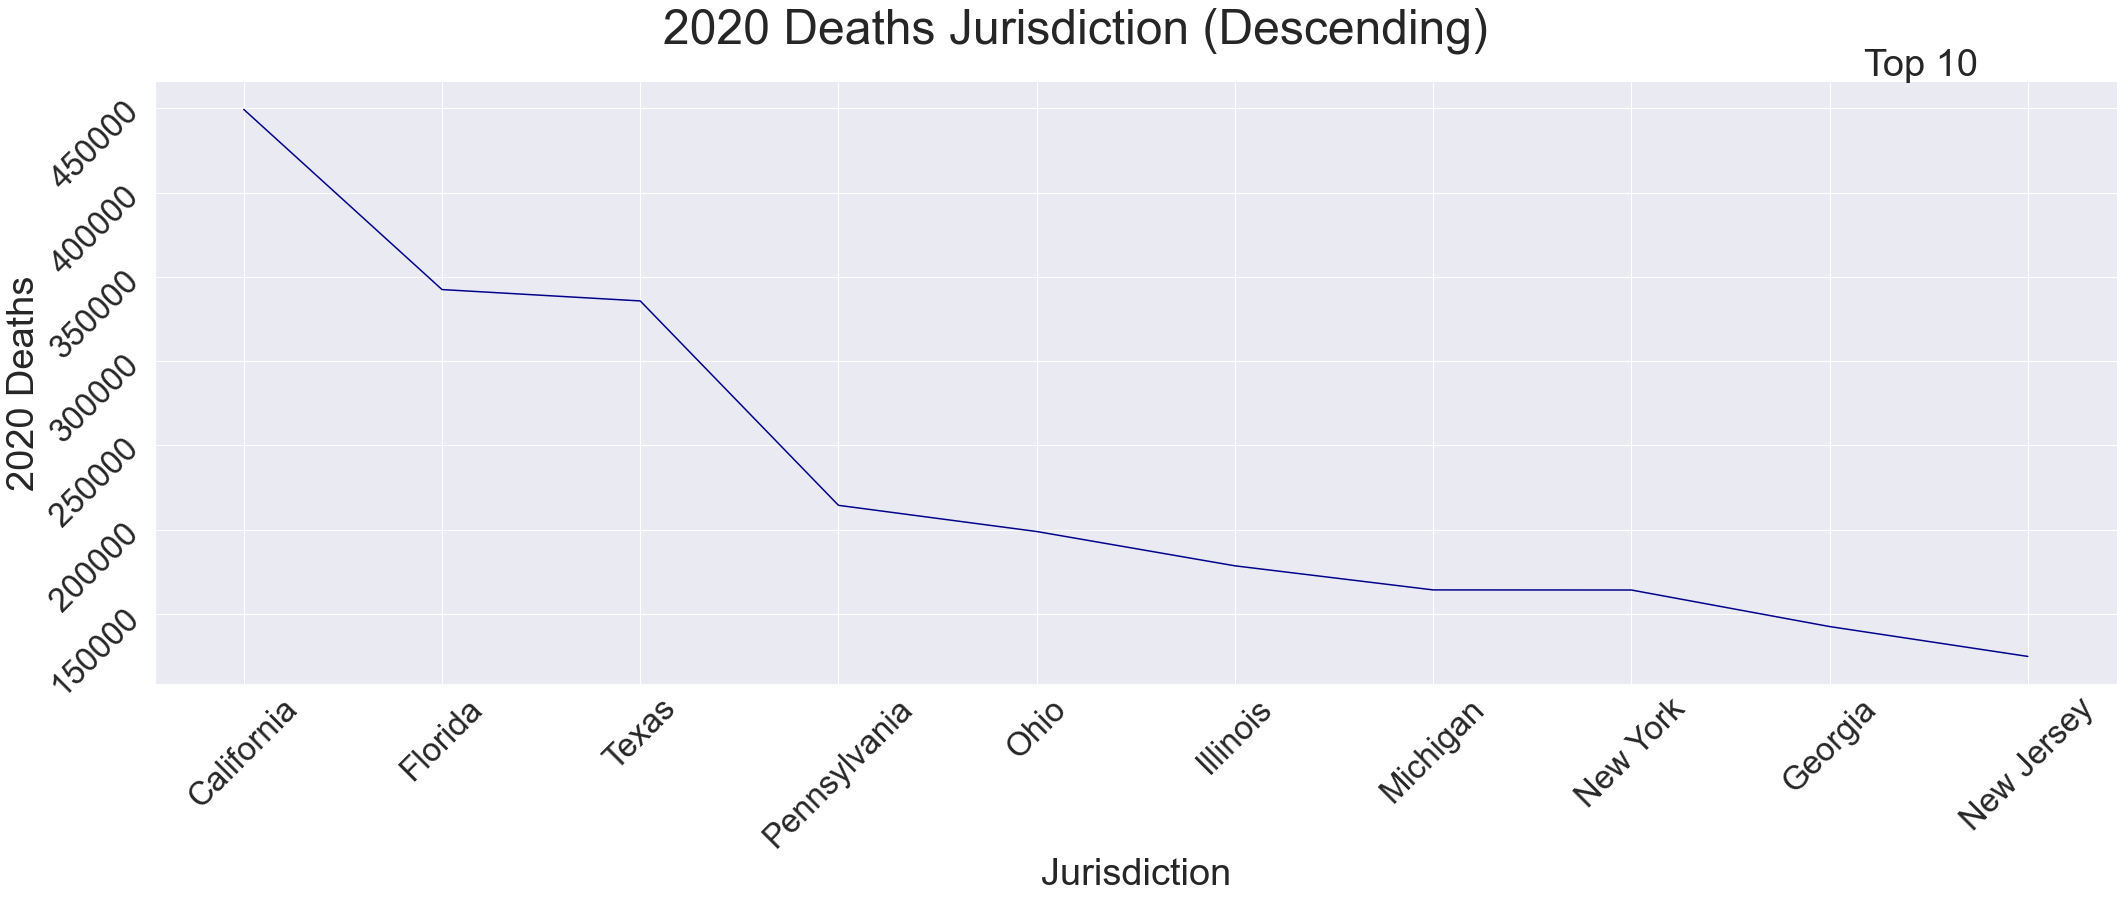

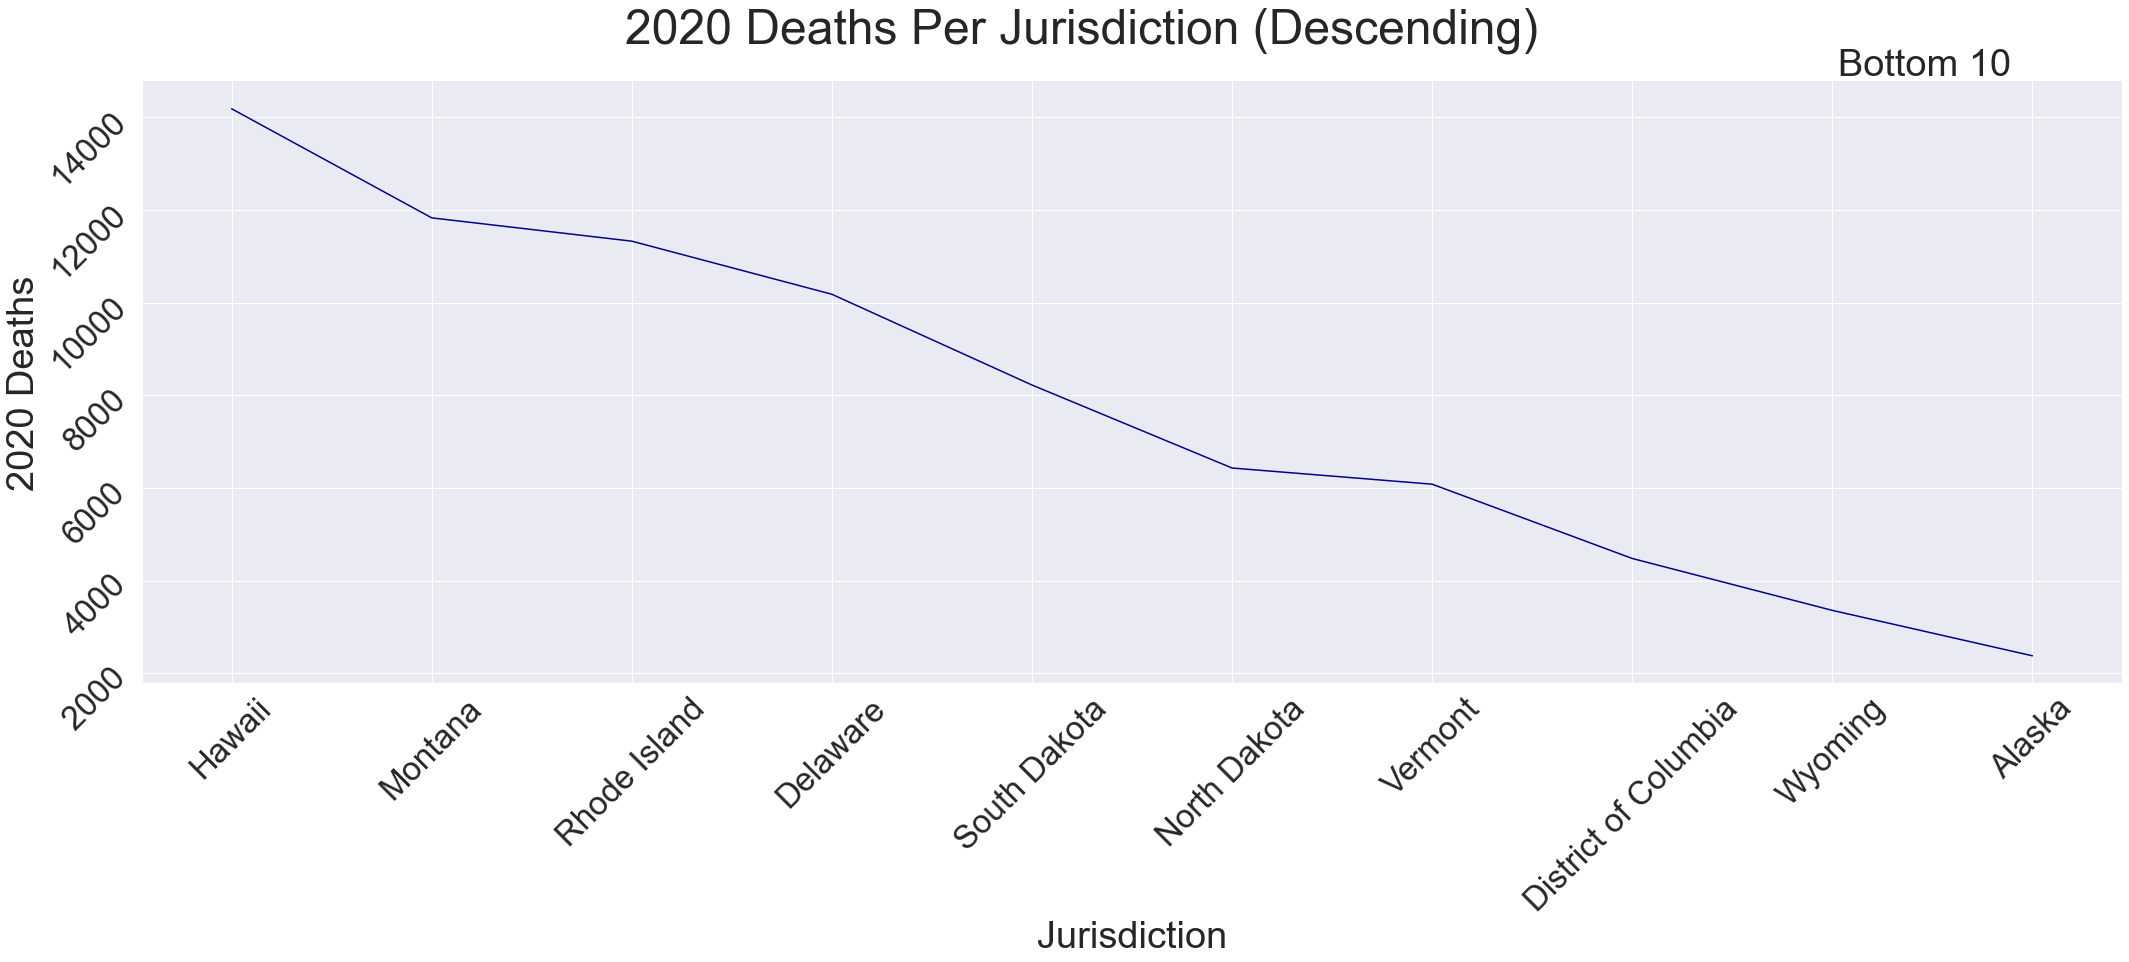

In [25]:
sns.set(font_scale = 3)
sns.relplot(x='Jurisdiction', y='NumberOfDeaths', kind = 'line', height=10, aspect=3, color='darkblue', data=jurisdiction_deaths2020_sorted.head(10))
plt.suptitle("2020 Deaths Jurisdiction (Descending)", size=48, y=1.05)
plt.title("Top 10", size=38, x=0.9)
plt.xlabel("Jurisdiction", size=38)
plt.ylabel("2020 Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

sns.set(font_scale = 3)
sns.relplot(x='Jurisdiction', y='NumberOfDeaths', kind = 'line', height=10, aspect=3, color='darkblue', data=jurisdiction_deaths2020_sorted.tail(10))
plt.suptitle("2020 Deaths Per Jurisdiction (Descending)", size=48, y=1.05)
plt.title("Bottom 10", size=38, x=0.9)
plt.xlabel("Jurisdiction", size=38)
plt.ylabel("2020 Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the above plots, you can visualize that California had the most total deaths and the most deaths in the year 2020, followed by Florida. Is this because California and Florida are highly populated? We will analyze this in the next step.

# Adding Population Data

One thing that we should keep in mind is that different states have different populations, and thus different death rates. California will have more deaths than Idaho simply because it has more people. To correct for this, we can figure out the Deaths Per Capita, or the proportion of deaths for the entire population.

However, our data doesn't have any population estimates so we will need to get that data ourselves. We can use the US Census to find the population estimates for each jurisdiction for each year. The data can be found [here](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage). Note that these are population estimates. The Census was conducted in 2010, and each year's population was estimated from that data.

In [26]:
# Load in the US Census Population data for 2010-2019
df_pop = pd.read_csv("nst-est2019-alldata.csv")
df_pop_clean = df_pop.copy()

# This dataset contains other information as well, like Deaths, Migration and Residuals.
# We only care about the population, so we can drop the rest
df_pop_clean = df_pop_clean[["NAME", "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", 
                             "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017",
                             "POPESTIMATE2018", "POPESTIMATE2019"]]
df_pop_clean.columns = ["Name", "pop2010", "pop2011", "pop2012", "pop2013", "pop2014", "pop2015",
                        "pop2016", "pop2017", "pop2018", "pop2019"]
df_pop_clean

,Name,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
6,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
7,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
8,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


Lets check for null values.

In [27]:
# Check for missing values
df_pop_clean.isnull().sum()

Name       0
pop2010    0
pop2011    0
pop2012    0
pop2013    0
pop2014    0
pop2015    0
pop2016    0
pop2017    0
pop2018    0
pop2019    0
dtype: int64

In [28]:
# Check for strange values
df_pop_clean.describe()

,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019
count,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01
mean,1.634538e+07,1.646227e+07,1.658118e+07,1.669428e+07,1.681470e+07,1.693647e+07,1.705668e+07,1.716284e+07,1.725010e+07,1.733179e+07
std,4.444586e+07,4.477654e+07,4.511484e+07,4.543594e+07,4.578079e+07,4.613239e+07,4.647905e+07,4.678579e+07,4.704177e+07,4.727622e+07
min,5.644870e+05,5.672990e+05,5.763050e+05,5.821220e+05,5.825310e+05,5.856130e+05,5.842150e+05,5.789310e+05,5.776010e+05,5.787590e+05
25%,1.854239e+06,1.856301e+06,1.856872e+06,1.865279e+06,1.879321e+06,1.891277e+06,1.905616e+06,1.915947e+06,1.925614e+06,1.934408e+06
50%,4.635649e+06,4.671994e+06,4.717354e+06,4.764080e+06,4.823617e+06,4.852347e+06,4.863525e+06,4.874486e+06,4.887681e+06,4.903185e+06
75%,9.574323e+06,9.657592e+06,9.749476e+06,9.843336e+06,9.929848e+06,9.931715e+06,9.950571e+06,9.973114e+06,9.984072e+06,9.986857e+06
max,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08


The data looks good but our populations only go through 2019. We also want to include 2020 population data. At time of writing this, the 2020 census data has not been released yet so we will still need to work with estimates. The best estimates that were found were from [here](https://en.wikipedia.org/wiki/2020_United_States_census). Lets do some webscraping to get the data that we need.

In [29]:
# URL of 2020 census estimates
url = "https://en.wikipedia.org/wiki/2020_United_States_census"
# Use pandas to scrape the tables from the wikipedia page
tables = pd.read_html(url)

In [30]:
# Gather and clean up the estimated 2020 populations
df_pop_2020 = tables[2].copy()
# We don't need information on 2010 populations or percent change since then. 
# Drop all columns that aren't the state and the 2020 estimated pop.
df_pop_2020 = df_pop_2020[["State or territory", "July 1, 2020 estimated population[78]"]]
# Rename columns to be more usable
df_pop_2020.columns = ["State", "pop2020"]
# Add pop2020 as column to overall population dataframe
df_pop_full = df_pop_clean.copy()
df_pop_full = df_pop_full.merge(df_pop_2020, how="left", left_on="Name", right_on="State")
# Drop added State column
df_pop_full.drop("State", axis=1, inplace=True)
df_pop_full.head(6)

,Name,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,329484123.0
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803,NaN
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004,NaN
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448,NaN
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268,NaN
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,4921532.0


Now we're going to merge our population and death dataframes. However, before we start, we should note that they are formatted differently. The population dataframe is per state, with each year as a new column. The deaths dataframe is per state and per year, with a single value for the deaths. 

Therefore, we're going to have to reformat our datasets. Let's transform our population data to match the form of the death counts dataframe.

In [31]:
df_deaths_per_state = yearJurisdiction_df.copy().reset_index()

# Change the dataframe to be per State, per year.
df_pop_per_state = pd.melt(df_pop_full, id_vars=["Name"])
# Now need to change the format of year from 'pop20XX' -> '20XX'
df_pop_per_state["variable"] = df_pop_per_state["variable"].apply(lambda x: re.sub(r"^pop", "", x))
# Rename the columns to be more understandable
df_pop_per_state.columns = ["Name", "Year", "Population"]
# Change the type of year to an int64 to match the deaths dataframe
df_pop_per_state["Year"] = df_pop_per_state["Year"].astype("int64")

# Merge the death and population dataframes
df_full = df_deaths_per_state.merge(df_pop_per_state, how="left", left_on=["Year", "Jurisdiction"], right_on=["Year", "Name"])
df_full

,Year,Jurisdiction,NumberOfDeaths,Name,Population
0,2015,Alabama,77032,Alabama,4852347.0
1,2015,Alaska,2254,Alaska,737498.0
2,2015,Arizona,79724,Arizona,6829676.0
3,2015,Arkansas,47900,Arkansas,2978048.0
4,2015,California,411494,California,38918045.0
...,...,...,...,...,...
313,2020,Virginia,113637,Virginia,8590563.0
314,2020,Washington,87051,Washington,7693612.0
315,2020,West Virginia,29333,West Virginia,1784787.0
316,2020,Wisconsin,84521,Wisconsin,5832655.0


Lets drop the 'Name' column.

In [32]:
df_full.drop('Name', axis = 1, inplace = True)

In [33]:
df_full

,Year,Jurisdiction,NumberOfDeaths,Population
0,2015,Alabama,77032,4852347.0
1,2015,Alaska,2254,737498.0
2,2015,Arizona,79724,6829676.0
3,2015,Arkansas,47900,2978048.0
4,2015,California,411494,38918045.0
...,...,...,...,...
313,2020,Virginia,113637,8590563.0
314,2020,Washington,87051,7693612.0
315,2020,West Virginia,29333,1784787.0
316,2020,Wisconsin,84521,5832655.0


Lets check for null values of the df_full dataframe.

In [34]:
df_full.isna().sum()

Year              0
Jurisdiction      0
NumberOfDeaths    0
Population        7
dtype: int64

Lets take a look at these null values.

In [35]:
df_full[df_full.isna().any(axis=1)]

,Year,Jurisdiction,NumberOfDeaths,Population
33,2015,New York City,86132,NaN
86,2016,New York City,85814,NaN
139,2017,New York City,86550,NaN
192,2018,New York City,87812,NaN
245,2019,New York City,86082,NaN
298,2020,New York City,97845,NaN
305,2020,Puerto Rico,40420,NaN


All of these null values are for 'New York City' and 'Puerto Rico'. We only want jurisdictions that are in the United States and that are not part of another jurisdiction so lets drop these rows.

In [36]:
df_full.drop(df_full[df_full['Jurisdiction'] == 'New York City'].index, inplace = True)
df_full.drop(df_full[df_full['Jurisdiction'] == 'Puerto Rico'].index, inplace = True)
df_full.isna().sum()

Year              0
Jurisdiction      0
NumberOfDeaths    0
Population        0
dtype: int64

Lets check data types.

In [37]:
df_full.dtypes

Year                int64
Jurisdiction       object
NumberOfDeaths      int64
Population        float64
dtype: object

'Population' is of type float and should be of type int so lets change it and check the data types again.

In [38]:
df_full = df_full.astype({'Population':'int'})
df_full.dtypes

Year               int64
Jurisdiction      object
NumberOfDeaths     int64
Population         int64
dtype: object

Now we have Deaths and Population per state per year. It's an easy calculation to find the Deaths per Capita, i.e. proportion of deaths per year per Jurisdiction.

In [39]:
dpc_lst = []

for i in range(len(df_full['NumberOfDeaths'])):
    dpc = df_full.iloc[i,2] / df_full.iloc[i,-1]
    dpc_lst.append(dpc)
    

df_full["DeathsPerCapita"] = dpc_lst
df_full.head()

,Year,Jurisdiction,NumberOfDeaths,Population,DeathsPerCapita
0,2015,Alabama,77032,4852347,0.015875
1,2015,Alaska,2254,737498,0.003056
2,2015,Arizona,79724,6829676,0.011673
3,2015,Arkansas,47900,2978048,0.016084
4,2015,California,411494,38918045,0.010573


Lets make a visualization of DeathsPerCapita by pulling a few random states and look at the change over time.

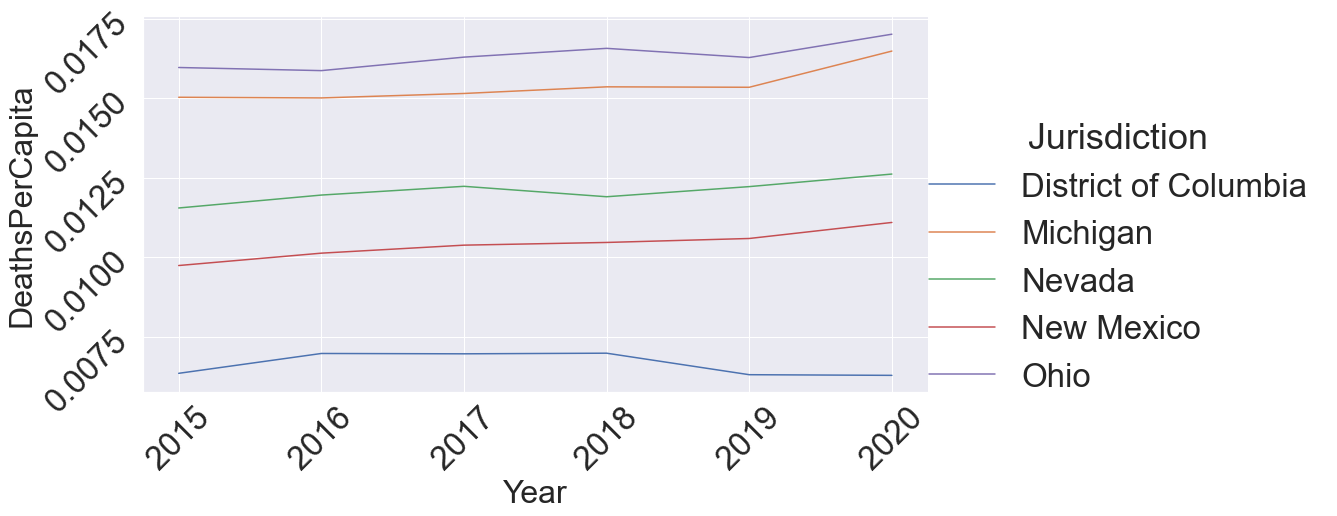

In [40]:
np.random.seed(12345)
random_states = np.random.choice(df_full["Jurisdiction"].unique(), 5, replace=False)

sns.relplot(x = 'Year', y = 'DeathsPerCapita', hue = 'Jurisdiction', kind = 'line', height=7, aspect=2, data=df_full.loc[df_full["Jurisdiction"].isin(random_states)])
plt.xlabel("Year", size=32)
plt.ylabel("DeathsPerCapita", size=32)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

With a death rate, we can calculate the number of deaths per 100,000 people. This way we're using integer counts rather than small fractions.

In [41]:
# We have the death rates. Let's calculate the number of deaths per 100,000 people.
df_full["DeathsPer100000"] = np.ceil(df_full["DeathsPerCapita"] * 100000)

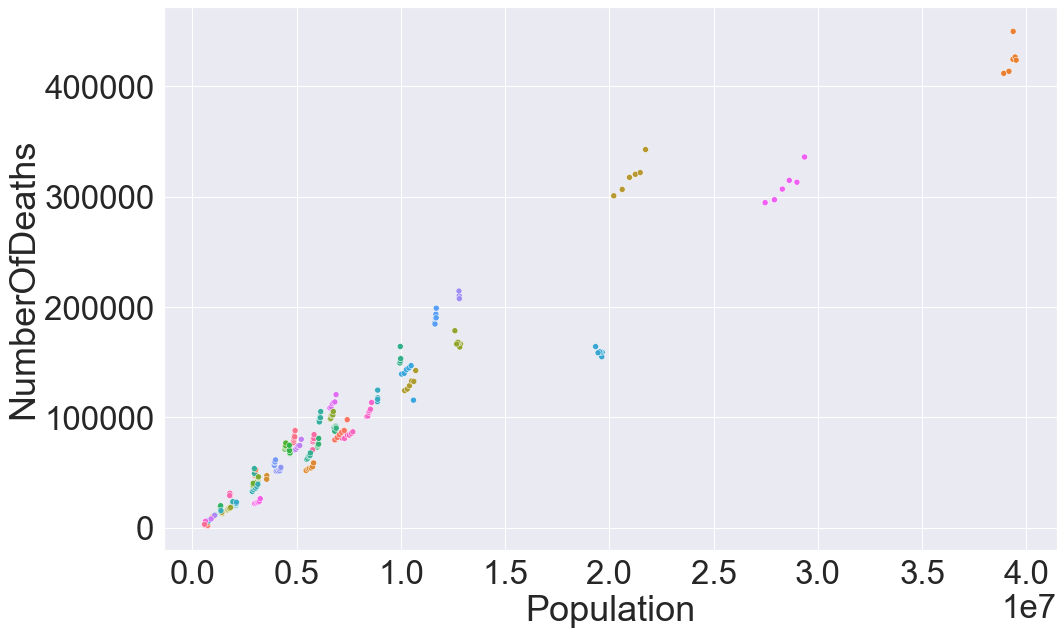

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
g = sns.scatterplot(x="Population", y="NumberOfDeaths", hue="Jurisdiction", data=df_full, ax=ax)
g.legend_.remove()
plt.show()

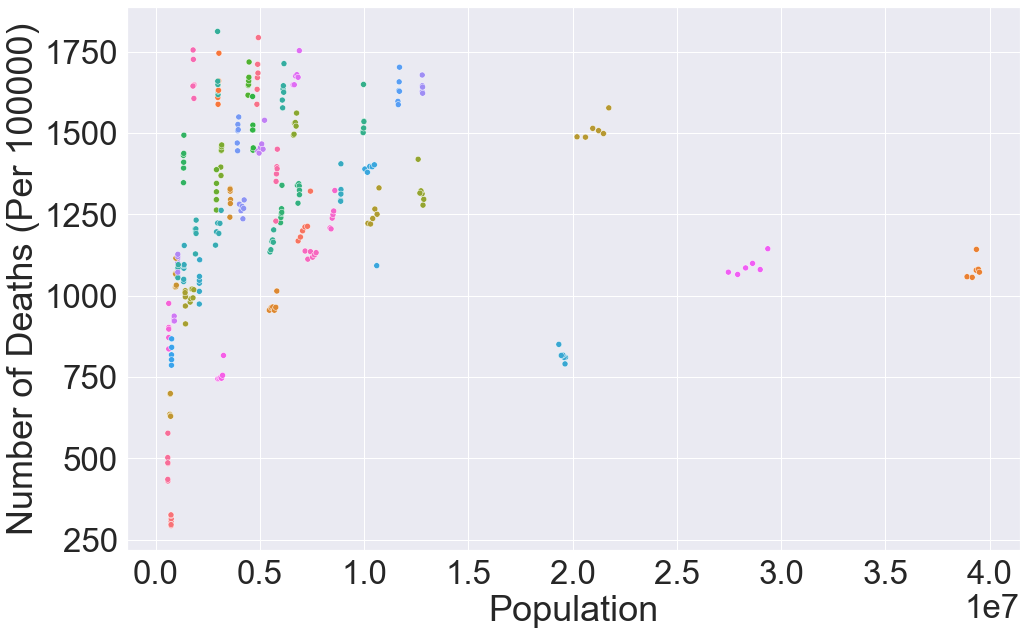

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
g = sns.scatterplot(x="Population", y="DeathsPer100000", hue="Jurisdiction", data=df_full, ax=ax)
g.legend_.remove()
ax.set(xlabel="Population", ylabel="Number of Deaths (Per 100000)")
plt.show()

In [44]:
# Save the final dataset as a CSV file
df_full.to_csv("State_Deaths_and_Pops.csv")

# Adding Predicted Deaths

Eventually, we want to determine how effective the lockdowns were at mitigating deaths. That means we want to figure out the number of deaths in 2020 that occured from the Corona Virus. That in itself is a very hard problem and could be it's own project. We are going to take a very simplified approach to this question: 

* We will use the 2015-2019 death data (where there was no pandemic) to predict the number of deaths per state that would've occured in 2020 if there was no pandemic. 
* Then, by subtracting the predicted numbers from the actual numbers, we can get a rough estimate of how many people died from the pandemic.

How are we going to do these predictions? We're only using two variables (population, state) to determine each prediction. Because this isn't overly complicated, and we can use the states as a grouping factor, we're going to use Lienar Mixed Models to do this.

In [45]:
# Create a Linear Mixed Models, grouped by state
df_full_no_2020 = df_full.loc[df_full["Year"]!=2020].dropna().copy()
mixed_model = smf.mixedlm("NumberOfDeaths ~ Population", 
                          df_full_no_2020, 
                          groups="Jurisdiction",
                          re_formula="~Population")
mixed_result = mixed_model.fit()
print(mixed_result.summary())

/Users/jared/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jared/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2131: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


                         Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          NumberOfDeaths
No. Observations:           255              Method:                      REML          
No. Groups:                 51               Scale:                       1848035.3670  
Min. group size:            5                Log-Likelihood:              -2475.4793    
Max. group size:            5                Converged:                   Yes           
Mean group size:            5.0                                                         
----------------------------------------------------------------------------------------
                                 Coef.     Std.Err.     z    P>|z|   [0.025     0.975]  
----------------------------------------------------------------------------------------
Intercept                      -24267.108    360.970 -67.228 0.000 -24974.596 -23559.620
Population                          0.023      

/Users/jared/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2168: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/jared/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2189: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [46]:
# Calculate predictions for each state
df_full_2020 = df_full.loc[df_full["Year"]==2020].dropna().copy()
rex = mixed_result.random_effects
general_slope = mixed_result.params["Population"]

mixed_preds = {}

for state in rex.keys():
    # Get the 2020 population of that individual
    # skip if the values is null
    pop = df_full_2020.loc[df_full_2020["Jurisdiction"]==state]["Population"].values
    if pop.size > 0:
        pop = pop[0]
        # Get the slope and intercept from the random effects
        slope = general_slope + rex[state]["Population"]
        intercept = rex[state]["Jurisdiction"]
        # Predict the value and store
        mixed_preds[state] = slope*pop + intercept
    
# Convert predictions to a dataframe
mixed_preds = pd.DataFrame.from_dict(mixed_preds, orient="index").reset_index()
mixed_preds.columns = ["State", "pred_deaths"]
mixed_preds["Population"] = df_full_2020["Population"].values

In [47]:
# Calculate the difference between the predicted values and the actual values
pred_diff = df_full_2020["NumberOfDeaths"].values - mixed_preds["pred_deaths"]

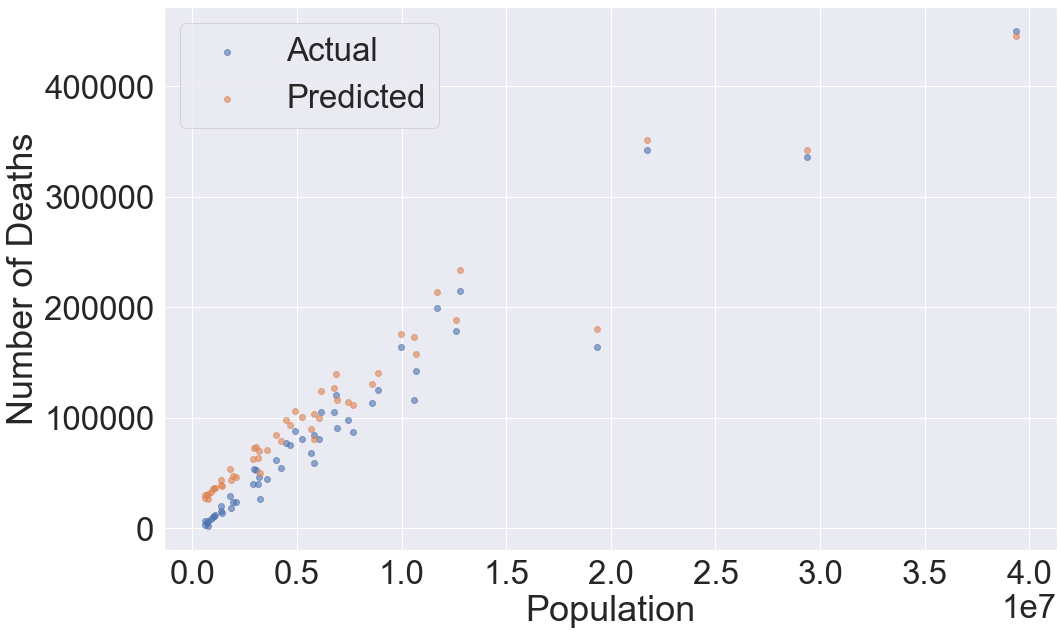

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.scatter(x="Population", y="NumberOfDeaths", data=df_full_2020, alpha=0.6, label="Actual")
ax.scatter(x="Population", y="pred_deaths", data=mixed_preds, alpha=0.6, label="Predicted")
ax.set_xlabel("Population")
ax.set_ylabel("Number of Deaths")
ax.legend()
plt.show()

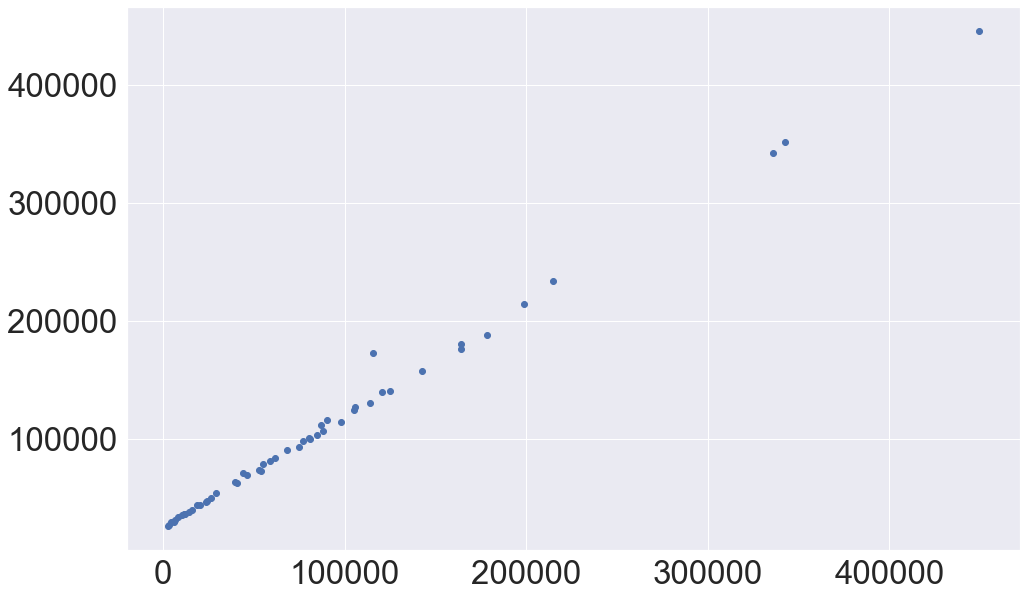

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.scatter(x=df_full_2020["NumberOfDeaths"], y=mixed_preds["pred_deaths"])
plt.show()

## Webscraping for State Lockdowns

We want to compare how different lockdown levels affected the overall death rates of the jurisdictions. So we're going to need information on lockdown levels. Thankfully, [Wikipedia](https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic) has a very good resource for lockdown information for each state. We can use webscraping to gather the information from the tables on this page to use for our goals.

In [50]:
# Cell to request and load the data
url = "https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic"

# Use pandas to webscrape wiki tables
tables = pd.read_html(url)

There are two tables on this page that we will use. 

* The first contains information on each state's level of lockdown. What activites were restricted, whether masks were required outdoors and others. We can use this to do some feature engineering on the severity of the lockdown for each state.
* The second table is the date range for states that gave "Stay at Home" orders. We can use these ranges to compare the death rates of states that did and didn't issue stay at home orders.

In [51]:
# Cell to extract and clean the table of restrictions

# Get the main table from the list
df_restrictions = tables[1].copy()

# The original table has stacked column names, so we need to change that to a list
# Don't care about supertitle, so can just take subcolumn name.
new_columns = [col[1] for col in df_restrictions.columns]
df_restrictions.columns = new_columns

# Fix the column names that contain source numbers
# Also shorten names that can be shortened
df_restrictions.rename(columns={"Face coverings required in public[5]": "Masks required in public", \
                                "Bars & sit-down restaurants": "Restaurants"}, inplace=True)

# Remove columns: 
# "State/territory.1": extra state column because same as "State/territory" column
# "Sources": Doesn't provide any usable information
df_restrictions.drop(["State/territory.1", "Sources"], axis=1, inplace=True)
df_restrictions

# Change datatypes of date columns to datetime
# Datetime only recognizes 0 padded numbers, so need to add 0 to strings
# Also, add the year 2020 to the string
def pad_emergency_dates(date):
    date = re.sub(r" ([0-9]{1}$)", r" 0\1", date)
    return date + ", 2020"
emergency_dates = df_restrictions["State of emergency declared"].apply(pad_emergency_dates)
df_restrictions["State of emergency declared"] = pd.to_datetime(emergency_dates, format="%B %d, %Y")

In [52]:
# Cell to extract and clean the dates of lockdowns

# Get the table of lockdown ending dates
df_lockdown_dates = tables[2].copy()

# Fix the Date for Wisconsin by removing source numbers
df_lockdown_dates["Date lifted"][22] = re.sub(r"\[[0-9]+\]+", "", df_lockdown_dates["Date lifted"][22])

# Change types of date columns in lockdown dataframe to datetime
df_lockdown_dates["Date enacted"] = pd.to_datetime(df_lockdown_dates["Date enacted"])
df_lockdown_dates["Date lifted"] = pd.to_datetime(df_lockdown_dates["Date lifted"])

In [53]:
# Cell to join the two tables

# Merge the two tables on by State
df_lockdown = df_restrictions.merge(df_lockdown_dates, left_on="State/territory", right_on="State", how="left")
# Drop extra State column
df_lockdown.drop(["State"], axis=1, inplace=True)
# Rename added columns
df_lockdown.rename(columns={"Date enacated": "Lockdown enacted date", "Date lifted": "Lockdown lifted date"}, inplace=True)
df_lockdown.head()

,State/territory,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date
0,Alabama,2020-03-13,April 4,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Yes,2020-04-04,2020-04-30
1,Alaska,2020-03-11,March 28,No,10 or more,Mandatory quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT
2,American Samoa,2020-01-29,No,No,10 or more,Travel suspended,Yes (remainder of term),Yes,No,No,NaT,NaT
3,Arizona,2020-03-11,March 31,No,50 or more,Limited quarantine,Yes (remainder of term),Yes,Yes,Yes,NaT,NaT
4,Arkansas,2020-03-11,No,Yes,10 or more,No,Yes (remainder of term),Yes,Yes,Regional,NaT,NaT


In [54]:
df_lockdown.isna().sum()

State/territory                      0
State of emergency declared          0
Stay at home ordered                 0
Masks required in public             0
Gatherings banned                    0
Out-of-state travel restrictions     0
Schools                              0
Daycares                             0
Restaurants                          0
Non-essential retail                 0
Date enacted                        33
Lockdown lifted date                33
dtype: int64

The dates table of "Stay at Home" orders only contains states that had a diffinitive end date. Some states issued stay at home orders, but never had an official end date to the order. Therefore, they don't appear in the table even though they had a Stay at Home order.

We can use the column in our overall lockdown dataframe to fill in some of the gaps in the dates dataframe.

In [55]:
# String cleanup so can be converted to a datetime object.
# Remove (advisory) and (partial advisory) additions
SAH_dates = df_lockdown["Stay at home ordered"].apply(lambda x: re.sub(r"\([\w ]*\)", "", x).strip())
# Some are coded as 'Regional.' These will be set to 'No'
SAH_dates = SAH_dates.apply(lambda x: "No" if x=="Regional" else x)
# Append '0' to numbers and '2020' to end of year. Same as with "State of Emergency declared" in above cell.
# This also adds "2020" to end of "No", but that gets fixed in next step.
SAH_dates = SAH_dates.apply(pad_emergency_dates)
# Convert to a datetime object and save to "Date enacted". Any 'No' values get set to NaT.
df_lockdown["Date enacted"] = pd.to_datetime(SAH_dates, format="%B %d, %Y", errors="coerce")

Some feature cleaning:

* For binary (or near binary) responses, will set to 0 or 1.
* Some features have long descriptions. We can replace those long strings with shorter, binary options.
* Some features have certain specific answers, that only show up once or twice. It would be best to combine these into a few, more general answers.

In [56]:
# Stay at Home ordered: Convert to binary if an order was given out.
# Advisory notices will be coded as 0, because not an order.
SaH = df_lockdown["Stay at home ordered"].apply(lambda x: "No" if "advisory" in x else x)
# Set 'Regional' to 'No'
SaH = SaH.apply(lambda x: "No" if x=="Regional" else x)
# Set to binary value. 0 if 'No' and 1 if else.
df_lockdown["Stay at home ordered"] = SaH.apply(lambda x: 0 if x=="No" else 1)

# Masks Required: Set to binary outcome by removing variable options
# The one state that has variable mask requirements in Tennessee. The majority of counties in 
# Tennessee don't require masks, so this will be coded as 'No'.
df_lockdown["Masks required in public"] = df_lockdown["Masks required in public"].apply(lambda x: 0 if x in ["No", "Varies by county"] else 1)

# Gatherings -> levels per amount
def clean_gatherings(x):
    if x=="10 or more" or x=="10 or more (recommended)":
        return 10
    elif x in ["11 or more", "11 or more, and public gathering in public places", "All outside, and 11 or more inside a household"]:
        return 11
    elif x=="6 or more":
        return 6
    elif x=="25 or more":
        return 25
    elif x=="50 or more":
        return 50
    else:
        return 0
    
df_lockdown["Gatherings banned"] = df_lockdown["Gatherings banned"].apply(clean_gatherings)

# Out of state travel -> 3 levels: None, Some, Full
def clean_travel(x):
    if x == "No":
        return "None"
    elif x in ["Mandatory quarantine", "Travel suspended"]:
        return "Full"
    else:
        return "Some"
df_lockdown["Out-of-state travel restrictions"] = df_lockdown["Out-of-state travel restrictions"].apply(clean_travel)

# Turn Schools in yes/no if they were suspended.
df_lockdown["Schools"] = df_lockdown["Schools"].apply(lambda x: 1 if x=="Yes (remainder of term)" else 0)

# Daycares, Restaurants and Non-essential retail all have 'Restricted' options. 
# The state did not directly order a full restriction, so they will be coded as 'No'.
df_lockdown["Daycares"] = df_lockdown["Daycares"].apply(lambda x: 1 if x=="Yes" else 0)
df_lockdown["Restaurants"] = df_lockdown["Restaurants"].apply(lambda x: 1 if x=="Yes" else 0)
df_lockdown["Non-essential retail"] = df_lockdown["Non-essential retail"].apply(lambda x: 1 if x=="Yes" else 0)

We've got a bunch of lockdown measures, so let's do some feature engineering to create an "overall lockdown severity" column. Our severity will come from:

* Whether a mask mandate was issued.
* Full Travel Restrictions were put in place.
* Gatherings of 10 or more were banned.
* If a Stay at Home order was issued.

These will each be a binary variable with an equal weight on the final outcome. Therefore the range of outcomes is [0, 4], which will be coded as [Minimal, Some, Moderate, Strict, Severe], respectively.

In [57]:
# Binary coding for "Gatherings banned"
gatherings = df_lockdown["Gatherings banned"] <= 10
# Determine if full travel restrictions were put in place
travel = df_lockdown["Out-of-state travel restrictions"] == "Full"

# Add the "Severity values" together
df_lockdown["Lockdown Severity"] = gatherings + travel + \
                                    df_lockdown["Masks required in public"] + df_lockdown["Stay at home ordered"]

/Users/jared/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


Finally, we can set the datatypes of our variables. Most will be categorical or binary.

In [58]:
# Set the type of variables 
df_lockdown["Stay at home ordered"] = df_lockdown["Stay at home ordered"].astype(bool)
df_lockdown["Masks required in public"] = df_lockdown["Masks required in public"].astype(bool)
df_lockdown["Gatherings banned"] = df_lockdown["Gatherings banned"].astype("category")
df_lockdown["Out-of-state travel restrictions"] = df_lockdown["Out-of-state travel restrictions"].astype("category")
df_lockdown["Schools"] = df_lockdown["Schools"].astype(bool)
df_lockdown["Daycares"] = df_lockdown["Daycares"].astype(bool)
df_lockdown["Restaurants"] = df_lockdown["Restaurants"].astype(bool)
df_lockdown["Non-essential retail"] = df_lockdown["Non-essential retail"].astype(bool)

In [59]:
df_lockdown.head()

,State/territory,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity
0,Alabama,2020-03-13,True,True,10,None,True,True,True,True,2020-04-04,2020-04-30,3
1,Alaska,2020-03-11,True,False,10,Full,True,True,True,True,2020-03-28,NaT,2
2,American Samoa,2020-01-29,False,False,10,Full,True,True,False,False,NaT,NaT,1
3,Arizona,2020-03-11,True,False,50,Some,True,True,True,True,2020-03-31,NaT,1
4,Arkansas,2020-03-11,False,True,10,None,True,True,True,False,NaT,NaT,2


Lets change the name of 'State/territory' column to 'Jurisdiction' to match the other dataframes.

In [60]:
df_lockdown = df_lockdown.rename(columns={'State/territory':'Jurisdiction'})

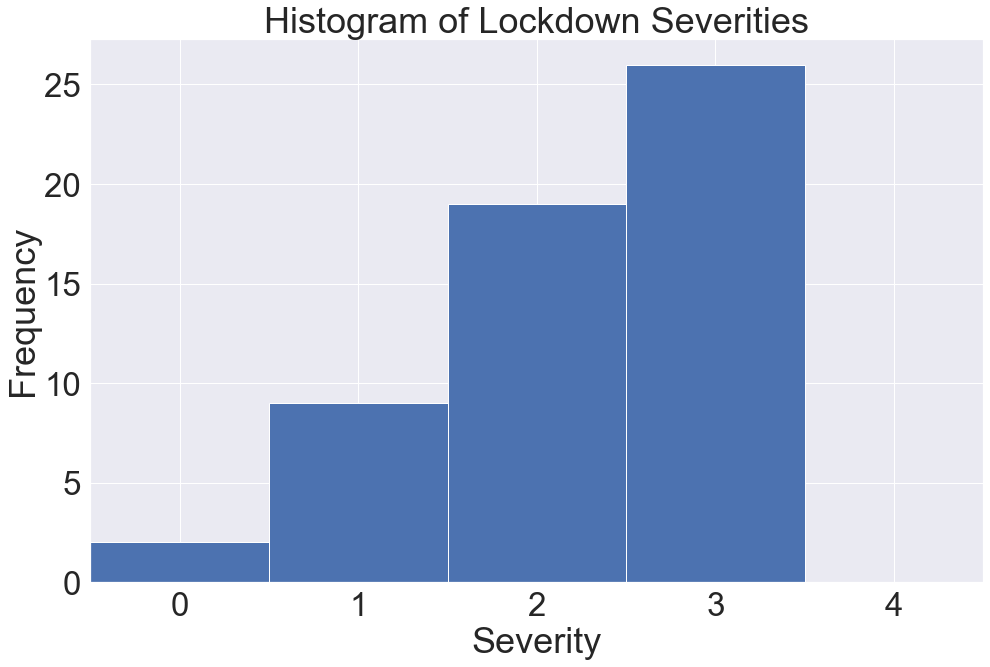

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
ax.hist(df_lockdown["Lockdown Severity"], bins=np.arange(0, 5) -0.5)
ax.set_xlim([-0.5, 4.5])
ax.set_title("Histogram of Lockdown Severities")
ax.set_xlabel("Severity")
ax.set_ylabel("Frequency")
plt.show()

In [62]:
# Save the dataframe as a pickle file
df_lockdown.to_csv("State_Lockdowns.csv")

## Combine Everything Together
We need to add total deaths and 2020 deaths to df in order to analyze them. Lets create another dataframe stateDeaths_2020 from yearJurisdiction_df and check the shape of the dataframes.

In [63]:
deaths_2020 = yearJurisdiction_df.loc[(2020)].reset_index()
deaths_total = jurisdiction_deaths.copy()

print(deaths_2020.shape)
print(deaths_total.shape)
print(df_lockdown.shape)


(53, 2)
(53, 2)
(56, 13)


All three dataframes have to have the same number of rows in order to combine them so lets drop the rows from the dataframes where state/territory are not in the other dataframes and check the shape of the dataframes again.

In [64]:
# Lists to store the state/territory that are not common to all three dataframes.
diff_elements1 = [i for i in list(df_lockdown['Jurisdiction']) if i not in list(deaths_2020['Jurisdiction'])]
diff_elements2 = [i for i in list(deaths_2020['Jurisdiction']) if i not in list(df_lockdown['Jurisdiction'])]

print(diff_elements1)
print(diff_elements2)

# Loop through diff_elements1 and delete that row from df.
for item in diff_elements1:
    df_lockdown.drop(df_lockdown[df_lockdown['Jurisdiction'] == item].index, inplace = True)

# Loop through diff_elements2 and delete that row from deaths_2020.
for item in diff_elements2:
    deaths_2020.drop(deaths_2020[deaths_2020['Jurisdiction'] == item].index, inplace = True)
    deaths_total.drop(deaths_total[deaths_total['Jurisdiction'] == item].index, inplace = True)
    

# Reset indexes
df_lockdown = df_lockdown.reset_index(drop=True)
deaths_2020 = deaths_2020.reset_index(drop=True)

print(deaths_2020.shape)
print(deaths_total.shape)
print(df_lockdown.shape)

['American Samoa', 'Guam', 'N. Mariana Islands', 'U.S. Virgin Islands']
['New York City']
(52, 2)
(52, 2)
(52, 13)


Now that all 3 dataframes have the same number of rows, lets make sure that all 3 dataframes have the same Jurisdiction in the same row for all 3 dataframes.

In [65]:
list(deaths_2020['Jurisdiction']) == list(deaths_total['Jurisdiction']) == list(df_lockdown['Jurisdiction'])

True

Now that all three dataframes have the same number of rows and the Jurisdiction is correct, we can successfully combine the dataframes.

In [66]:
# Adding column '2020 Deaths' and column 'Total Deaths' to df_lockdown
df_lockdown['2020 Deaths'] = list(deaths_2020['NumberOfDeaths'])
df_lockdown['Total Deaths'] = list(deaths_total['NumberOfDeaths'])
df_lockdown = df_lockdown.merge(df_full_2020[["Jurisdiction", "DeathsPerCapita"]], how="left", on="Jurisdiction")

df_lockdown.head()

,Jurisdiction,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity,2020 Deaths,Total Deaths,DeathsPerCapita
0,Alabama,2020-03-13,True,True,10,None,True,True,True,True,2020-04-04,2020-04-30,3,88198,492182,0.017921
1,Alaska,2020-03-11,True,False,10,Full,True,True,True,True,2020-03-28,NaT,2,2380,13654,0.003255
2,Arizona,2020-03-11,True,False,50,Some,True,True,True,True,2020-03-31,NaT,1,97983,518901,0.013203
3,Arkansas,2020-03-11,False,True,10,None,True,True,True,False,NaT,NaT,2,52855,296365,0.017441
4,California,2020-03-04,True,True,0,None,True,True,True,True,2020-03-19,NaT,3,449439,2548245,0.011416


Lets check df_lockdown for null values.

In [67]:
display(df_lockdown.isna().sum())

Jurisdiction                         0
State of emergency declared          0
Stay at home ordered                 0
Masks required in public             0
Gatherings banned                    0
Out-of-state travel restrictions     0
Schools                              0
Daycares                             0
Restaurants                          0
Non-essential retail                 0
Date enacted                         7
Lockdown lifted date                29
Lockdown Severity                    0
2020 Deaths                          0
Total Deaths                         0
DeathsPerCapita                      1
dtype: int64

There is 1 null value in the 'DeathsPerCapita' column. Lets take a look at it.

In [68]:
df_lockdown[df_lockdown['DeathsPerCapita'].isna()]

,Jurisdiction,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity,2020 Deaths,Total Deaths,DeathsPerCapita
39,Puerto Rico,2020-03-12,True,False,0,Some,True,True,True,True,2020-03-15,NaT,2,40420,255812,NaN


Puerto Rico is not in the United States so we will just drop this row.

In [69]:
index = df_lockdown[(df_lockdown['Jurisdiction'] == 'Puerto Rico')].index
df_lockdown.drop(index, inplace = True)
display(df_lockdown['Jurisdiction'][df_lockdown['Jurisdiction'] == 'Puerto Rico'].count())

0

Lets check df_lockdown datatypes.

In [70]:
df_lockdown.dtypes

Jurisdiction                                object
State of emergency declared         datetime64[ns]
Stay at home ordered                          bool
Masks required in public                      bool
Gatherings banned                         category
Out-of-state travel restrictions          category
Schools                                       bool
Daycares                                      bool
Restaurants                                   bool
Non-essential retail                          bool
Date enacted                        datetime64[ns]
Lockdown lifted date                datetime64[ns]
Lockdown Severity                            int64
2020 Deaths                                  int64
Total Deaths                                 int64
DeathsPerCapita                            float64
dtype: object

Lets sort df_lockdown by total deaths for all 6 years.

In [71]:
df_mostTotalDeaths = df_lockdown.sort_values('Total Deaths', ascending=False).reset_index(drop=True)

df_mostTotalDeaths.head(10)

,Jurisdiction,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity,2020 Deaths,Total Deaths,DeathsPerCapita
0,California,2020-03-04,True,True,0,None,True,True,True,True,2020-03-19,NaT,3,449439,2548245,0.011416
1,Florida,2020-03-01,True,False,10,Some,True,True,True,True,2020-04-03,2020-05-04,2,342518,1908728,0.015760
2,Texas,2020-03-13,True,True,10,Some,True,True,True,True,2020-04-02,2020-04-30,3,335766,1861608,0.011436
3,Pennsylvania,2020-03-06,True,False,10,Some,True,True,True,True,2020-04-01,NaT,2,214464,1259968,0.016777
4,Ohio,2020-03-09,True,True,11,Full,True,False,True,True,2020-03-23,NaT,3,198922,1142658,0.017012
5,Illinois,2020-03-09,True,True,0,None,True,True,True,True,2020-03-21,2020-05-30,3,178559,1011281,0.014185
6,New York,2020-03-07,True,True,0,None,True,True,True,True,2020-03-22,NaT,3,164201,954933,0.008492
7,Michigan,2020-03-11,True,True,0,None,True,True,True,True,2020-03-24,2020-06-02,3,164261,920491,0.016481
8,North Carolina,2020-03-10,True,True,10,None,True,True,True,True,2020-03-30,NaT,3,115686,830180,0.010913
9,Georgia,2020-03-14,True,False,10,None,True,False,True,True,2020-04-03,2020-04-30,2,142512,786982,0.013306


We will do the same for deaths in 2020. 

In [72]:
df_mostDeaths2020 = df_lockdown.sort_values('2020 Deaths', ascending=False).reset_index(drop=True)

df_mostDeaths2020.head(10)

,Jurisdiction,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity,2020 Deaths,Total Deaths,DeathsPerCapita
0,California,2020-03-04,True,True,0,None,True,True,True,True,2020-03-19,NaT,3,449439,2548245,0.011416
1,Florida,2020-03-01,True,False,10,Some,True,True,True,True,2020-04-03,2020-05-04,2,342518,1908728,0.015760
2,Texas,2020-03-13,True,True,10,Some,True,True,True,True,2020-04-02,2020-04-30,3,335766,1861608,0.011436
3,Pennsylvania,2020-03-06,True,False,10,Some,True,True,True,True,2020-04-01,NaT,2,214464,1259968,0.016777
4,Ohio,2020-03-09,True,True,11,Full,True,False,True,True,2020-03-23,NaT,3,198922,1142658,0.017012
5,Illinois,2020-03-09,True,True,0,None,True,True,True,True,2020-03-21,2020-05-30,3,178559,1011281,0.014185
6,Michigan,2020-03-11,True,True,0,None,True,True,True,True,2020-03-24,2020-06-02,3,164261,920491,0.016481
7,New York,2020-03-07,True,True,0,None,True,True,True,True,2020-03-22,NaT,3,164201,954933,0.008492
8,Georgia,2020-03-14,True,False,10,None,True,False,True,True,2020-04-03,2020-04-30,2,142512,786982,0.013306
9,New Jersey,2020-03-09,True,True,0,None,True,True,True,True,2020-03-21,2020-06-09,3,124781,704821,0.014048


Lets sort df_lockdown by deaths per capita.

In [73]:
df_dpc_sorted = df_lockdown.sort_values('DeathsPerCapita', ascending=False).reset_index(drop=True)

df_dpc_sorted

,Jurisdiction,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity,2020 Deaths,Total Deaths,DeathsPerCapita
0,Mississippi,2020-03-04,True,False,0,None,True,False,True,True,2020-04-03,2020-04-27,2,53752,298492,0.018118
1,Alabama,2020-03-13,True,True,10,None,True,True,True,True,2020-04-04,2020-04-30,3,88198,492182,0.017921
2,Tennessee,2020-03-12,True,False,10,None,True,True,True,True,2020-04-02,2020-04-30,2,120715,678965,0.017528
3,Arkansas,2020-03-11,False,True,10,None,True,True,True,False,NaT,NaT,2,52855,296365,0.017441
4,Kentucky,2020-03-06,False,True,10,Full,True,True,True,True,2020-03-26,NaT,2,76897,443485,0.017175
5,Missouri,2020-03-13,True,False,10,Some,True,False,True,True,2020-04-06,2020-05-03,2,105342,598774,0.017124
6,Ohio,2020-03-09,True,True,11,Full,True,False,True,True,2020-03-23,NaT,3,198922,1142658,0.017012
7,Pennsylvania,2020-03-06,True,False,10,Some,True,True,True,True,2020-04-01,NaT,2,214464,1259968,0.016777
8,Michigan,2020-03-11,True,True,0,None,True,True,True,True,2020-03-24,2020-06-02,3,164261,920491,0.016481
9,West Virginia,2020-03-04,True,True,0,None,True,True,True,True,2020-03-23,2020-05-04,3,29333,181559,0.016435


# Lockdown Analysis

Lets analyze how different levels of lockdown affected different states. To start off with, let's look at whether requiring masks had a difference between deaths per capita.

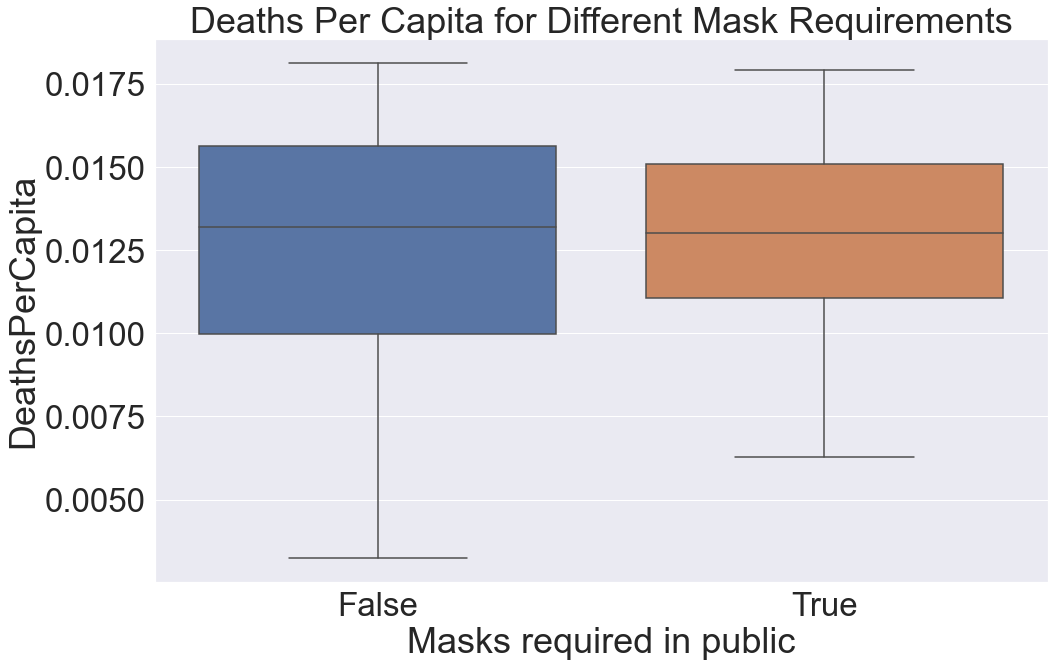

In [74]:
plt.figure(figsize=(16, 10))
sns.boxplot(x="Masks required in public", y="DeathsPerCapita", data=df_lockdown)
plt.title("Deaths Per Capita for Different Mask Requirements")
plt.show()

There doesn't appear to be a significant difference between these two box plots. Lets use ANOVA to determine if there is a significant difference between the groups. We will use a significance level of $\alpha=0.05$.

In [75]:
# Stats models don't like column names with spaces so lets rename them.
df_masks_dpc = df_lockdown[["Masks required in public", "DeathsPerCapita"]].copy()
df_masks_dpc.columns = ["masks", "dpc"]

# ANOVA test of DeathsPerCapita per Mask requirement
mod = smf.ols("dpc ~ masks", df_masks_dpc).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

            df    sum_sq   mean_sq        F  PR(>F)
masks      1.0  0.000002  0.000002  0.18895  0.6657
Residual  49.0  0.000567  0.000012      NaN     NaN


The p-value from our ANOVA table is $0.67$ which is greater than the significant level so we fail to reject the null hypothesis. Therefore, there is not a statistically significant difference between the groups, meaning states that required masks in public did not have significantly reduced death rates per capita than states that did not require masks.

Let's look at the amount of travel restrictions that were put in place.

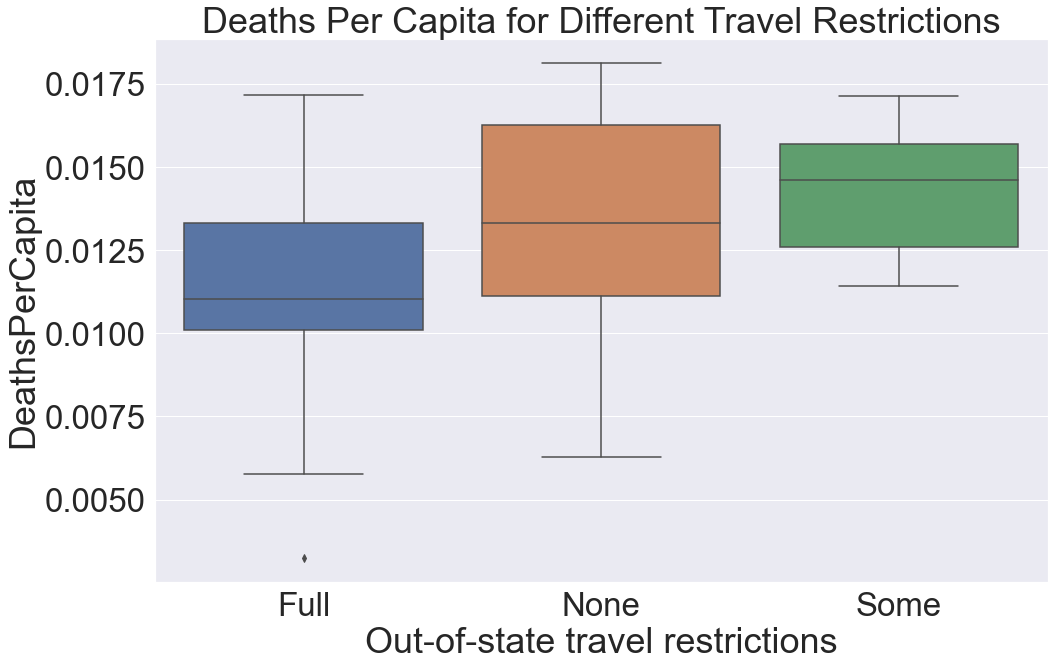

In [76]:
plt.figure(figsize=(16, 10))
sns.boxplot(x="Out-of-state travel restrictions", y="DeathsPerCapita", data=df_lockdown)
plt.title("Deaths Per Capita for Different Travel Restrictions")
plt.show()

In [77]:
df_travel_dpc = df_lockdown[["Out-of-state travel restrictions", "DeathsPerCapita"]].copy()
df_travel_dpc.columns = ["travel", "dpc"]

mod_travel_dpc = smf.ols("dpc ~ travel", df_travel_dpc).fit()
aov_table = sm.stats.anova_lm(mod_travel_dpc)
print(aov_table)

            df    sum_sq   mean_sq         F    PR(>F)
travel     2.0  0.000067  0.000034  3.207031  0.049286
Residual  48.0  0.000502  0.000010       NaN       NaN


From the ANOVA results, we get the p-values of $0.049$ which is just below the significance level, therefore is significantly different.

Lets look at the "Lockdown Severity" feature.

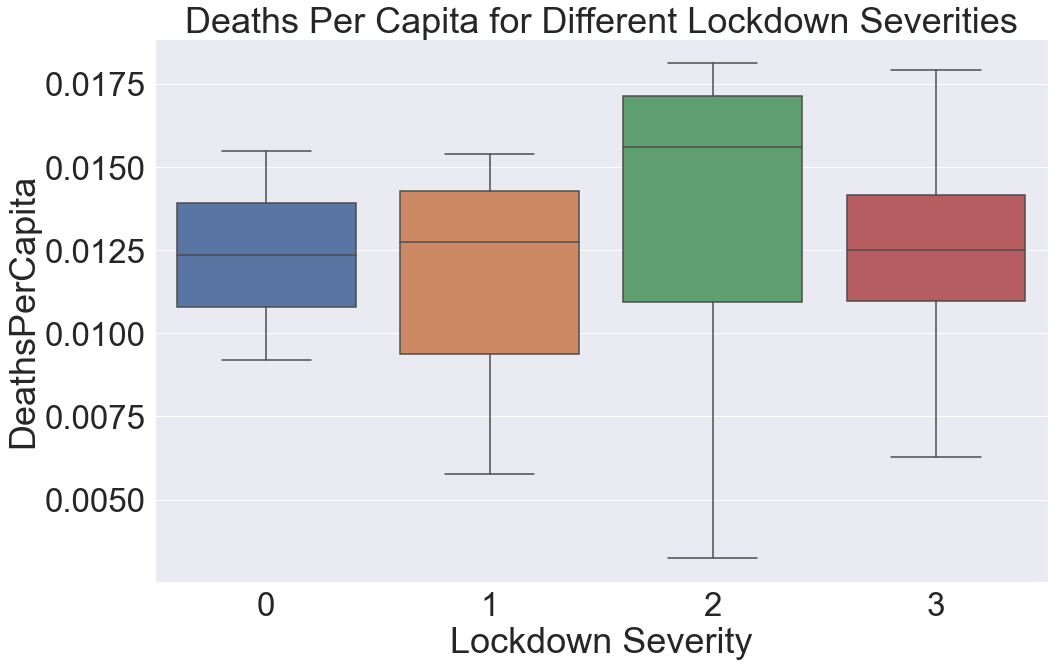

In [78]:
# boxplots of different lockdown levels
plt.figure(figsize=(16, 10))
sns.boxplot(x="Lockdown Severity", y="DeathsPerCapita", data=df_lockdown)
plt.title("Deaths Per Capita for Different Lockdown Severities")
plt.show()

In [79]:
df_severity_dpc = df_lockdown[["Lockdown Severity", "DeathsPerCapita"]].copy()
df_severity_dpc.columns = ["severity", "dpc"]

# ANOVA test for Difference in DeathsPerCapita per Mask Requirement
mod_severity_dpc = smf.ols("dpc ~ severity", df_severity_dpc).fit()
aov_table = sm.stats.anova_lm(mod_severity_dpc)
print(aov_table)

            df        sum_sq       mean_sq         F    PR(>F)
severity   1.0  3.947585e-07  3.947585e-07  0.033997  0.854474
Residual  49.0  5.689626e-04  1.161148e-05       NaN       NaN


From the ANOVA results, we get p-values of $0.854$. Therefore, we fail to reject the null hypothesis and assert that there is not a statistically signficant difference between the DeathsPerCapita of states that had different lockdown severity levels.

# Some More Plots

For the following plots, these are the dataframes we will be working with.

In [80]:
display(df_mostTotalDeaths.head())
display(df_mostDeaths2020.head())
display(df_dpc_sorted.head())

,Jurisdiction,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity,2020 Deaths,Total Deaths,DeathsPerCapita
0,California,2020-03-04,True,True,0,None,True,True,True,True,2020-03-19,NaT,3,449439,2548245,0.011416
1,Florida,2020-03-01,True,False,10,Some,True,True,True,True,2020-04-03,2020-05-04,2,342518,1908728,0.015760
2,Texas,2020-03-13,True,True,10,Some,True,True,True,True,2020-04-02,2020-04-30,3,335766,1861608,0.011436
3,Pennsylvania,2020-03-06,True,False,10,Some,True,True,True,True,2020-04-01,NaT,2,214464,1259968,0.016777
4,Ohio,2020-03-09,True,True,11,Full,True,False,True,True,2020-03-23,NaT,3,198922,1142658,0.017012


,Jurisdiction,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity,2020 Deaths,Total Deaths,DeathsPerCapita
0,California,2020-03-04,True,True,0,None,True,True,True,True,2020-03-19,NaT,3,449439,2548245,0.011416
1,Florida,2020-03-01,True,False,10,Some,True,True,True,True,2020-04-03,2020-05-04,2,342518,1908728,0.015760
2,Texas,2020-03-13,True,True,10,Some,True,True,True,True,2020-04-02,2020-04-30,3,335766,1861608,0.011436
3,Pennsylvania,2020-03-06,True,False,10,Some,True,True,True,True,2020-04-01,NaT,2,214464,1259968,0.016777
4,Ohio,2020-03-09,True,True,11,Full,True,False,True,True,2020-03-23,NaT,3,198922,1142658,0.017012


,Jurisdiction,State of emergency declared,Stay at home ordered,Masks required in public,Gatherings banned,Out-of-state travel restrictions,Schools,Daycares,Restaurants,Non-essential retail,Date enacted,Lockdown lifted date,Lockdown Severity,2020 Deaths,Total Deaths,DeathsPerCapita
0,Mississippi,2020-03-04,True,False,0,None,True,False,True,True,2020-04-03,2020-04-27,2,53752,298492,0.018118
1,Alabama,2020-03-13,True,True,10,None,True,True,True,True,2020-04-04,2020-04-30,3,88198,492182,0.017921
2,Tennessee,2020-03-12,True,False,10,None,True,True,True,True,2020-04-02,2020-04-30,2,120715,678965,0.017528
3,Arkansas,2020-03-11,False,True,10,None,True,True,True,False,NaT,NaT,2,52855,296365,0.017441
4,Kentucky,2020-03-06,False,True,10,Full,True,True,True,True,2020-03-26,NaT,2,76897,443485,0.017175


Lets plot the top jurisdiction deaths mask mandate in 2020.

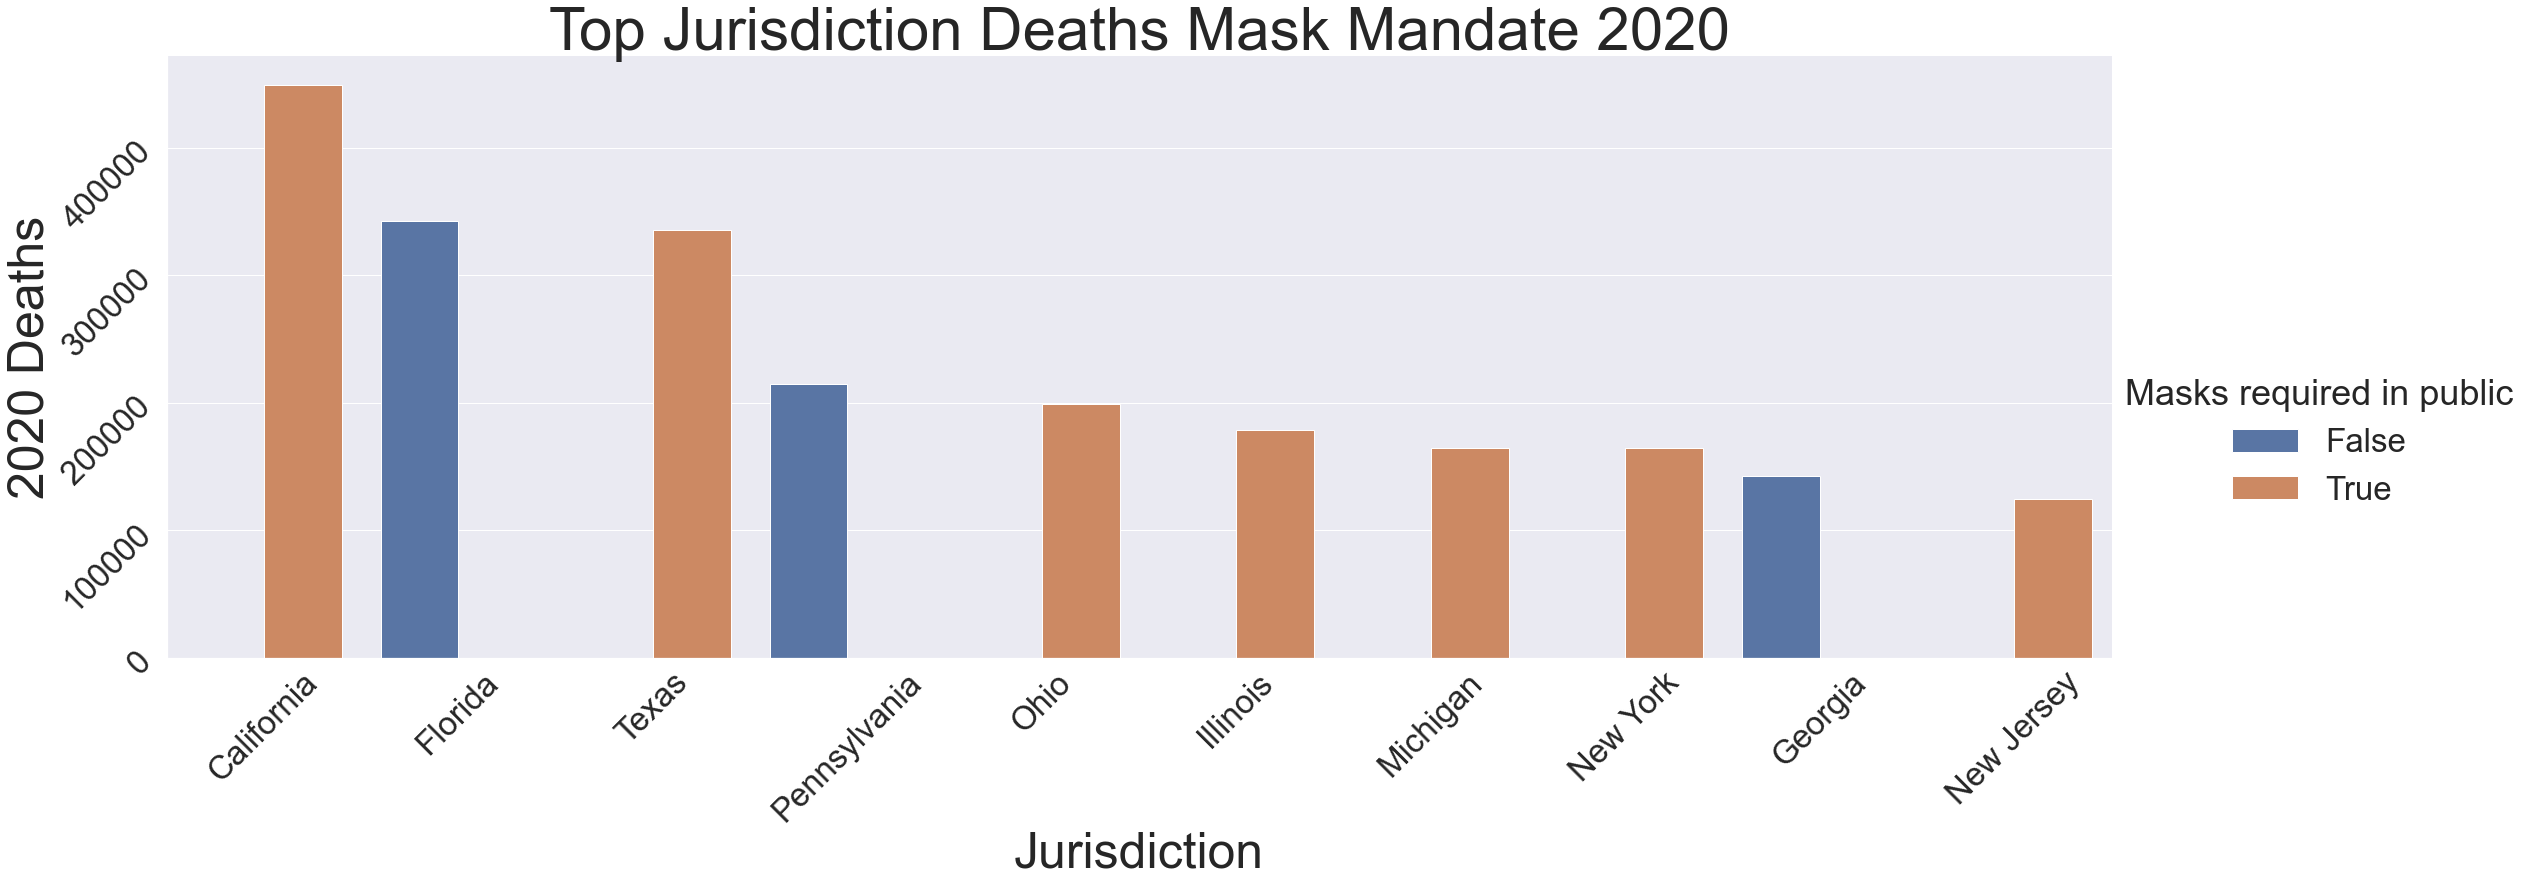

In [81]:
sns.catplot(x='Jurisdiction', y='2020 Deaths', hue='Masks required in public', kind='bar', height=10, aspect=3, data=df_mostDeaths2020.head(10))
plt.title('Top Jurisdiction Deaths Mask Mandate 2020', size=60)
plt.xlabel('Jurisdiction', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

The barplot visualization above displays data that shows how effective mask mandates were in the top 10 Jurisdictions with the most deaths. Brown bars indicate masks required in public and blue bars indicate no masks required in public. According to the plot, 7 of the top death jurisdictions required masks in public and 3 of the top death jurisdictions did not require masks in public. The number one death state (California) required masks in public and the number two death state (Florida) did not require masks in public. The above plot indicates that mask mandates did not make a difference.

Now lets plot the bottom jurisdiction deaths mandate in 2020.

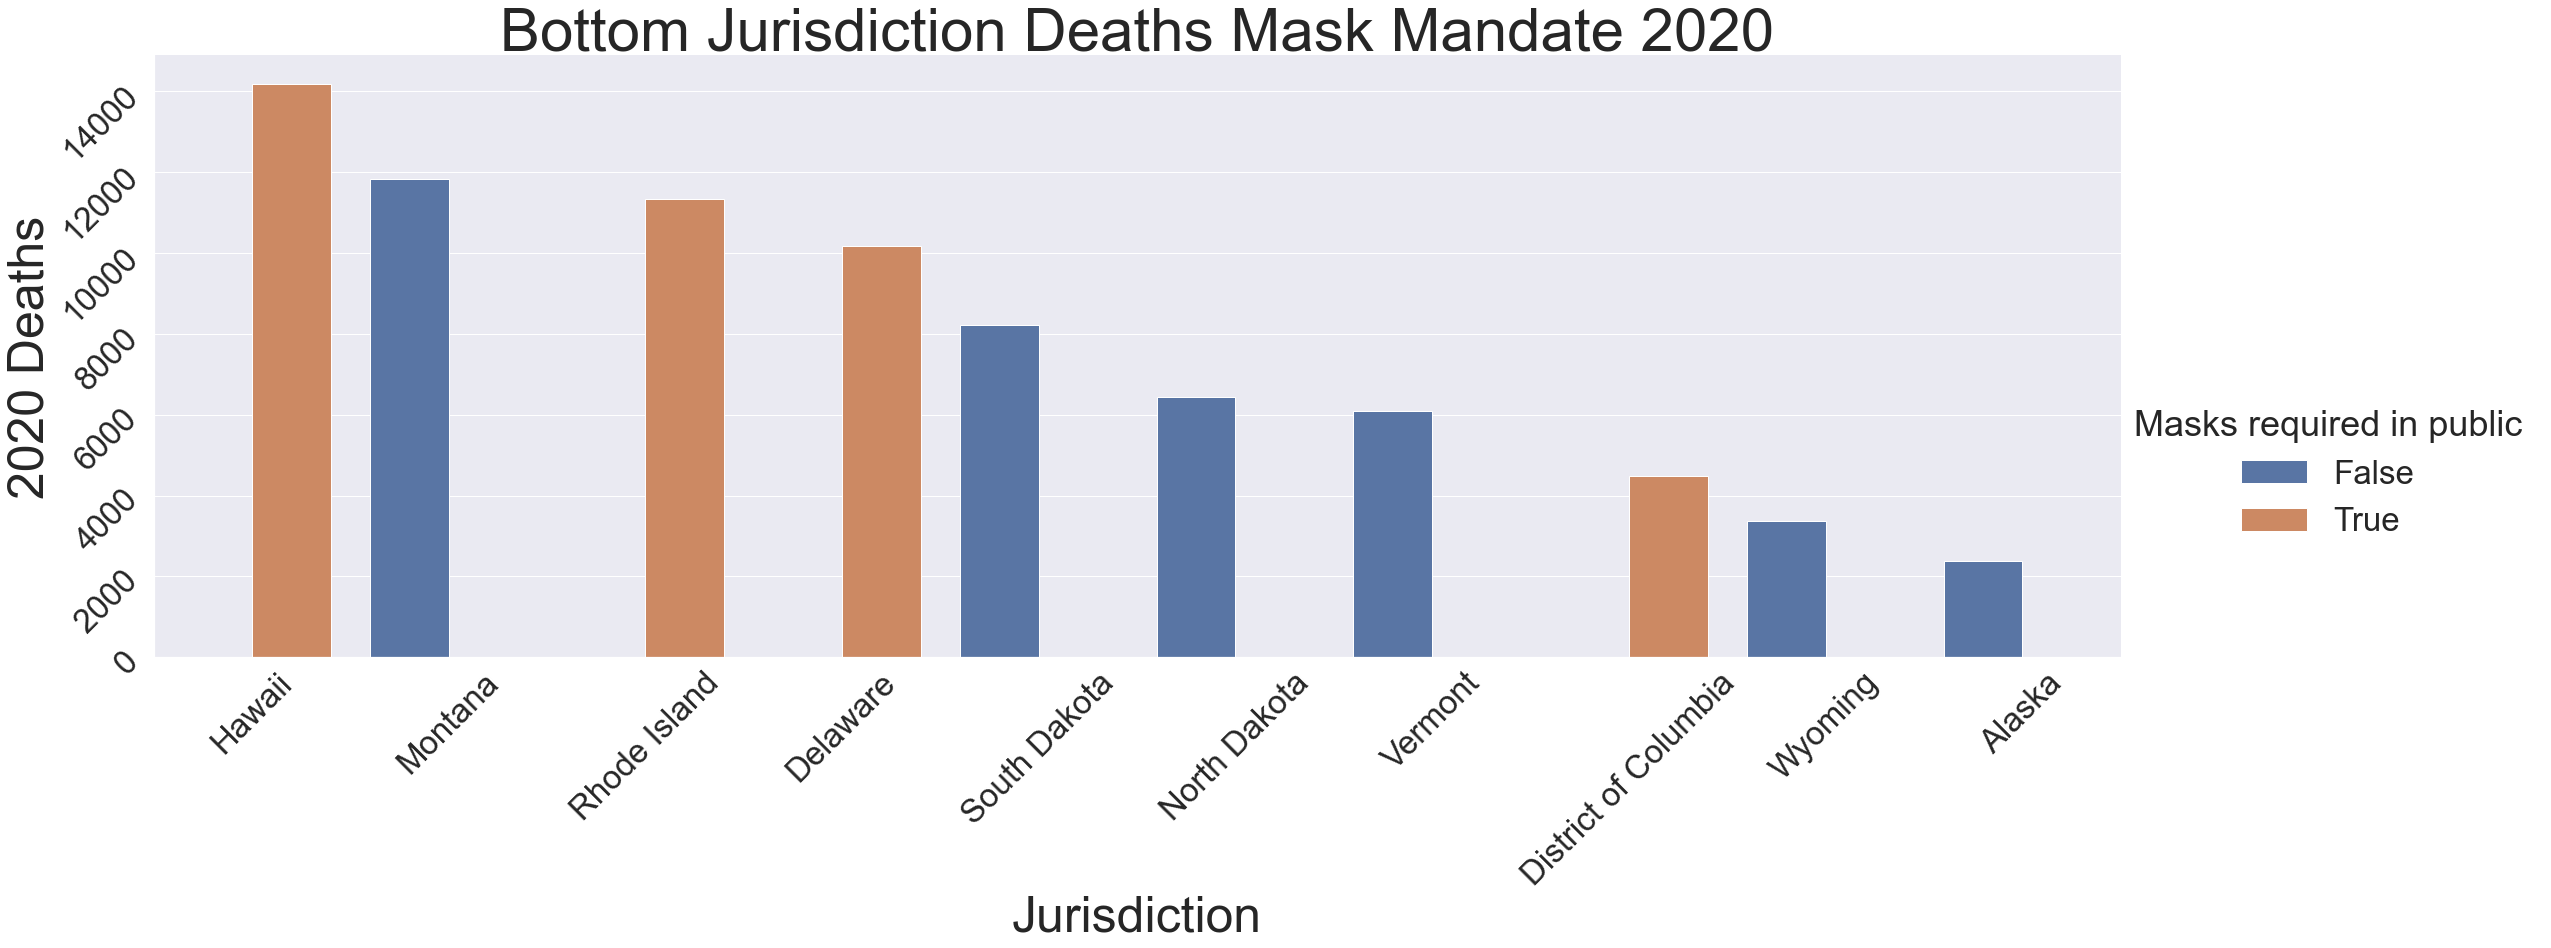

In [82]:
sns.catplot(x='Jurisdiction', y='2020 Deaths', hue='Masks required in public', kind='bar', height=10, aspect=3, data=df_mostDeaths2020.tail(10))
plt.title('Bottom Jurisdiction Deaths Mask Mandate 2020', size=60)
plt.xlabel('Jurisdiction', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

The bar plot with the bottom jurisdiction deaths mask mandate in 2020 displays the jurisdictions with the least amount of deaths mask mandate in 2020. It shows that 4 of the bottom jurisdictions required masks and 6 of them did not require masks.

Now lets plot the DeathsPerCapita instead of deaths.

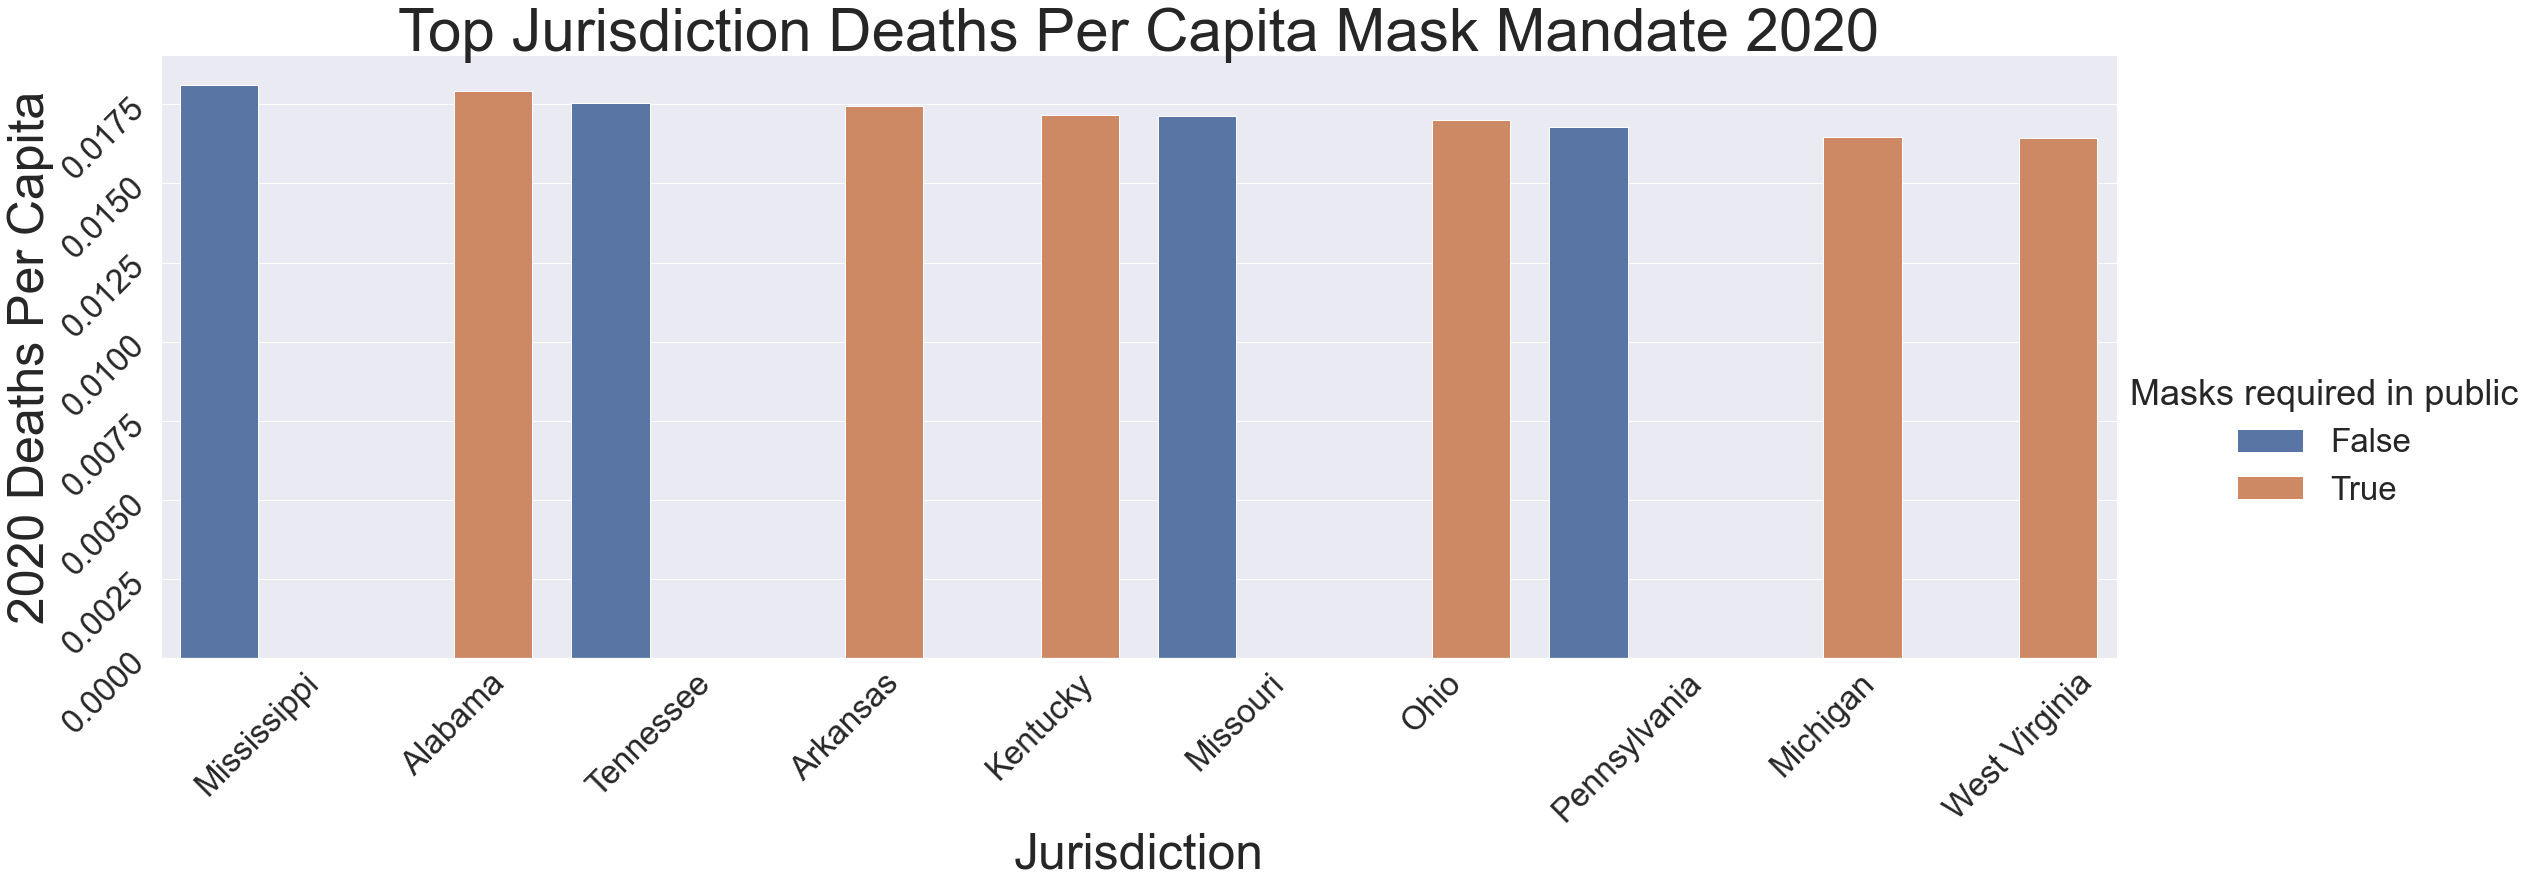

In [83]:
sns.catplot(x='Jurisdiction', y='DeathsPerCapita', hue='Masks required in public', kind='bar', height=10, aspect=3, data=df_dpc_sorted.head(10))
plt.title('Top Jurisdiction Deaths Per Capita Mask Mandate 2020', size=60)
plt.xlabel('Jurisdiction', size=50)
plt.ylabel('2020 Deaths Per Capita', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

The bar plot above displays the top 10 jurisdictions with the highest deaths per capita rate. The visualization shows that 6 of the top deaths per capita jurisdictions required masks and 4 of them did not require masks.

Now lets plot the bottom jurisdictions deaths per capita in 2020.

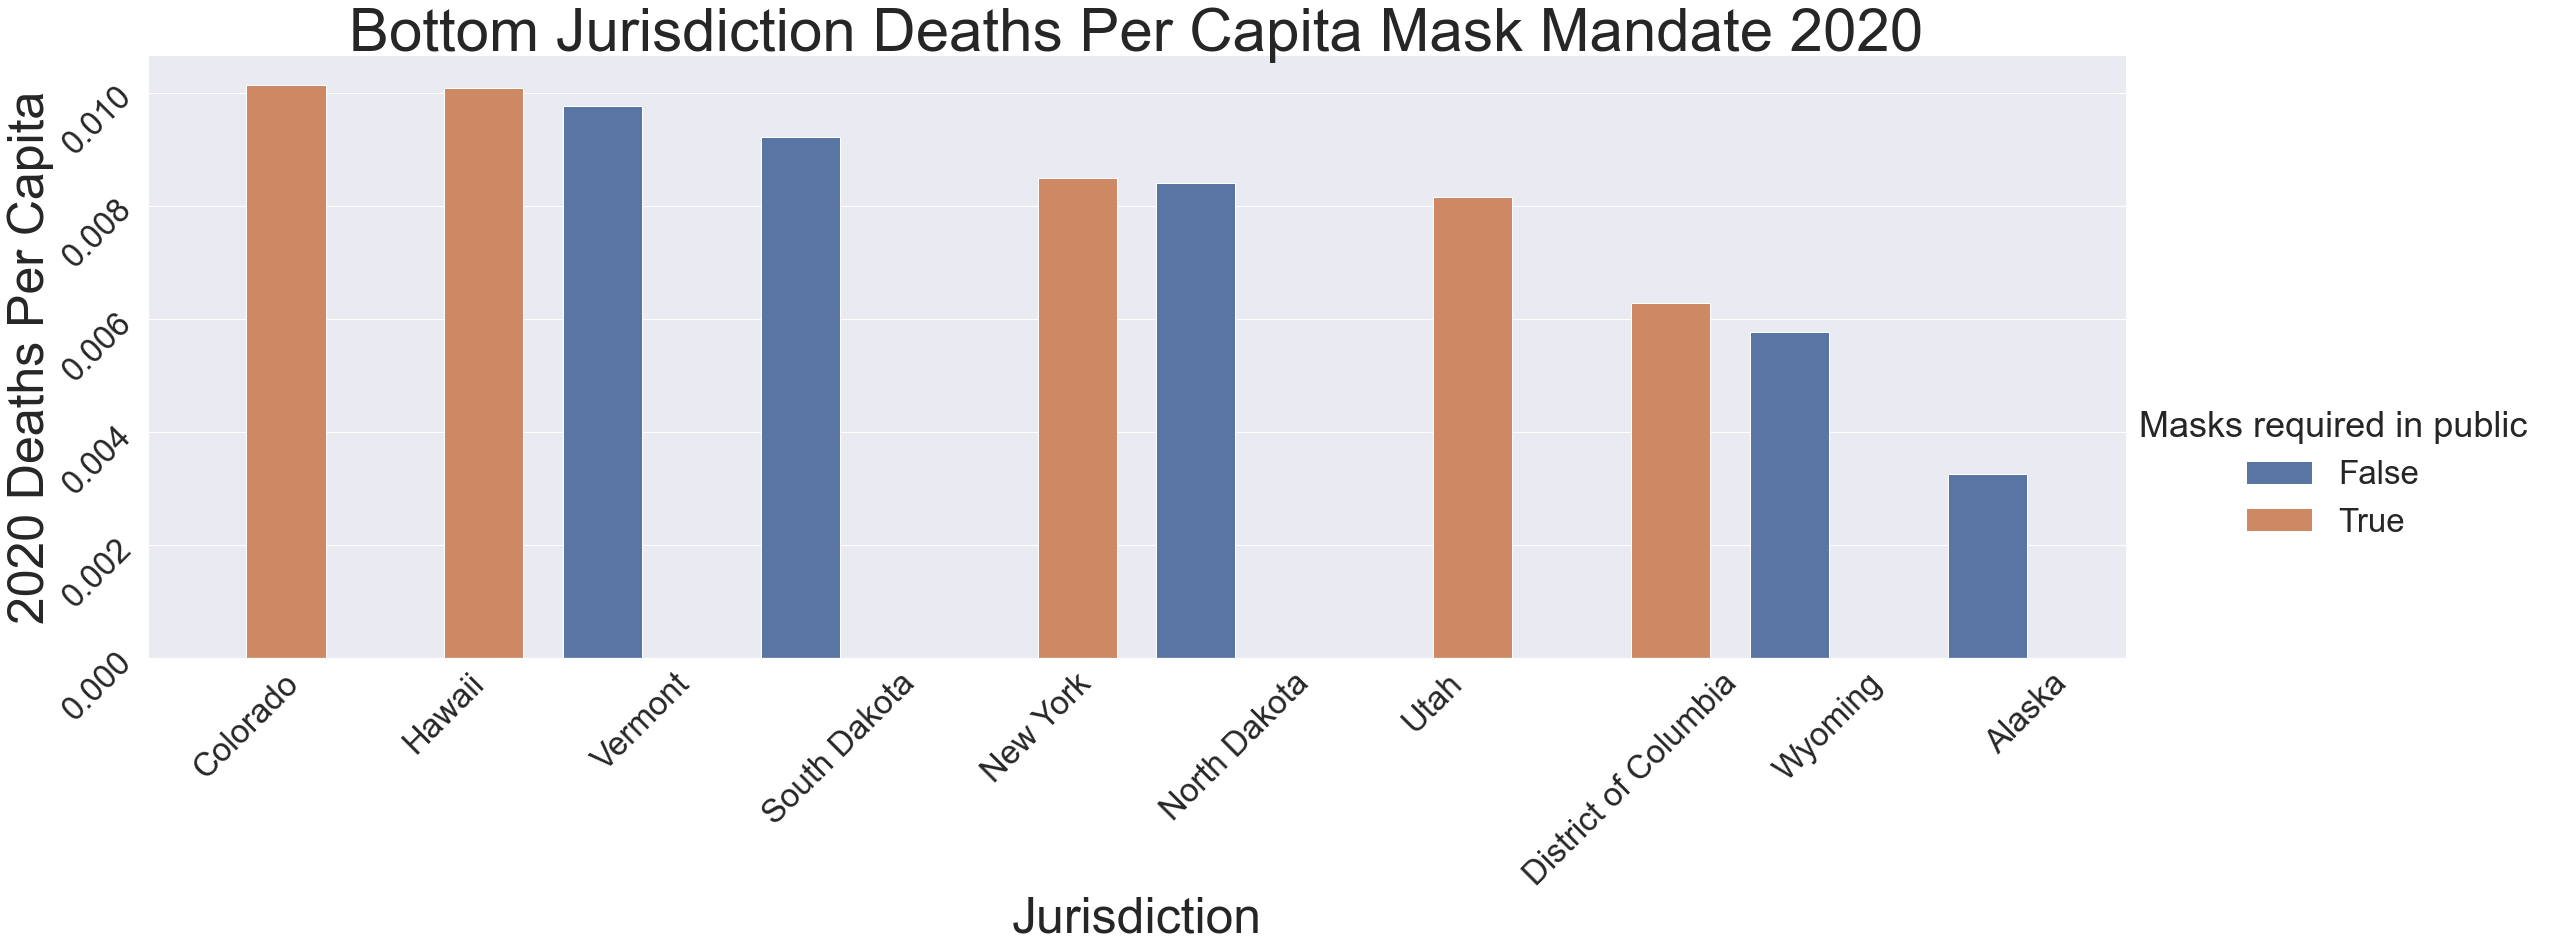

In [84]:
sns.catplot(x='Jurisdiction', y='DeathsPerCapita', hue='Masks required in public', kind='bar', height=10, aspect=3, data=df_dpc_sorted.tail(10))
plt.title('Bottom Jurisdiction Deaths Per Capita Mask Mandate 2020', size=60)
plt.xlabel('Jurisdiction', size=50)
plt.ylabel('2020 Deaths Per Capita', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

The plot above shows the jurisdictions with the lowest deaths per capita rate. It visualizes that 5 of the jurisdictions required masks and the other 5 did not require masks.

Lets look at gatherings banned.

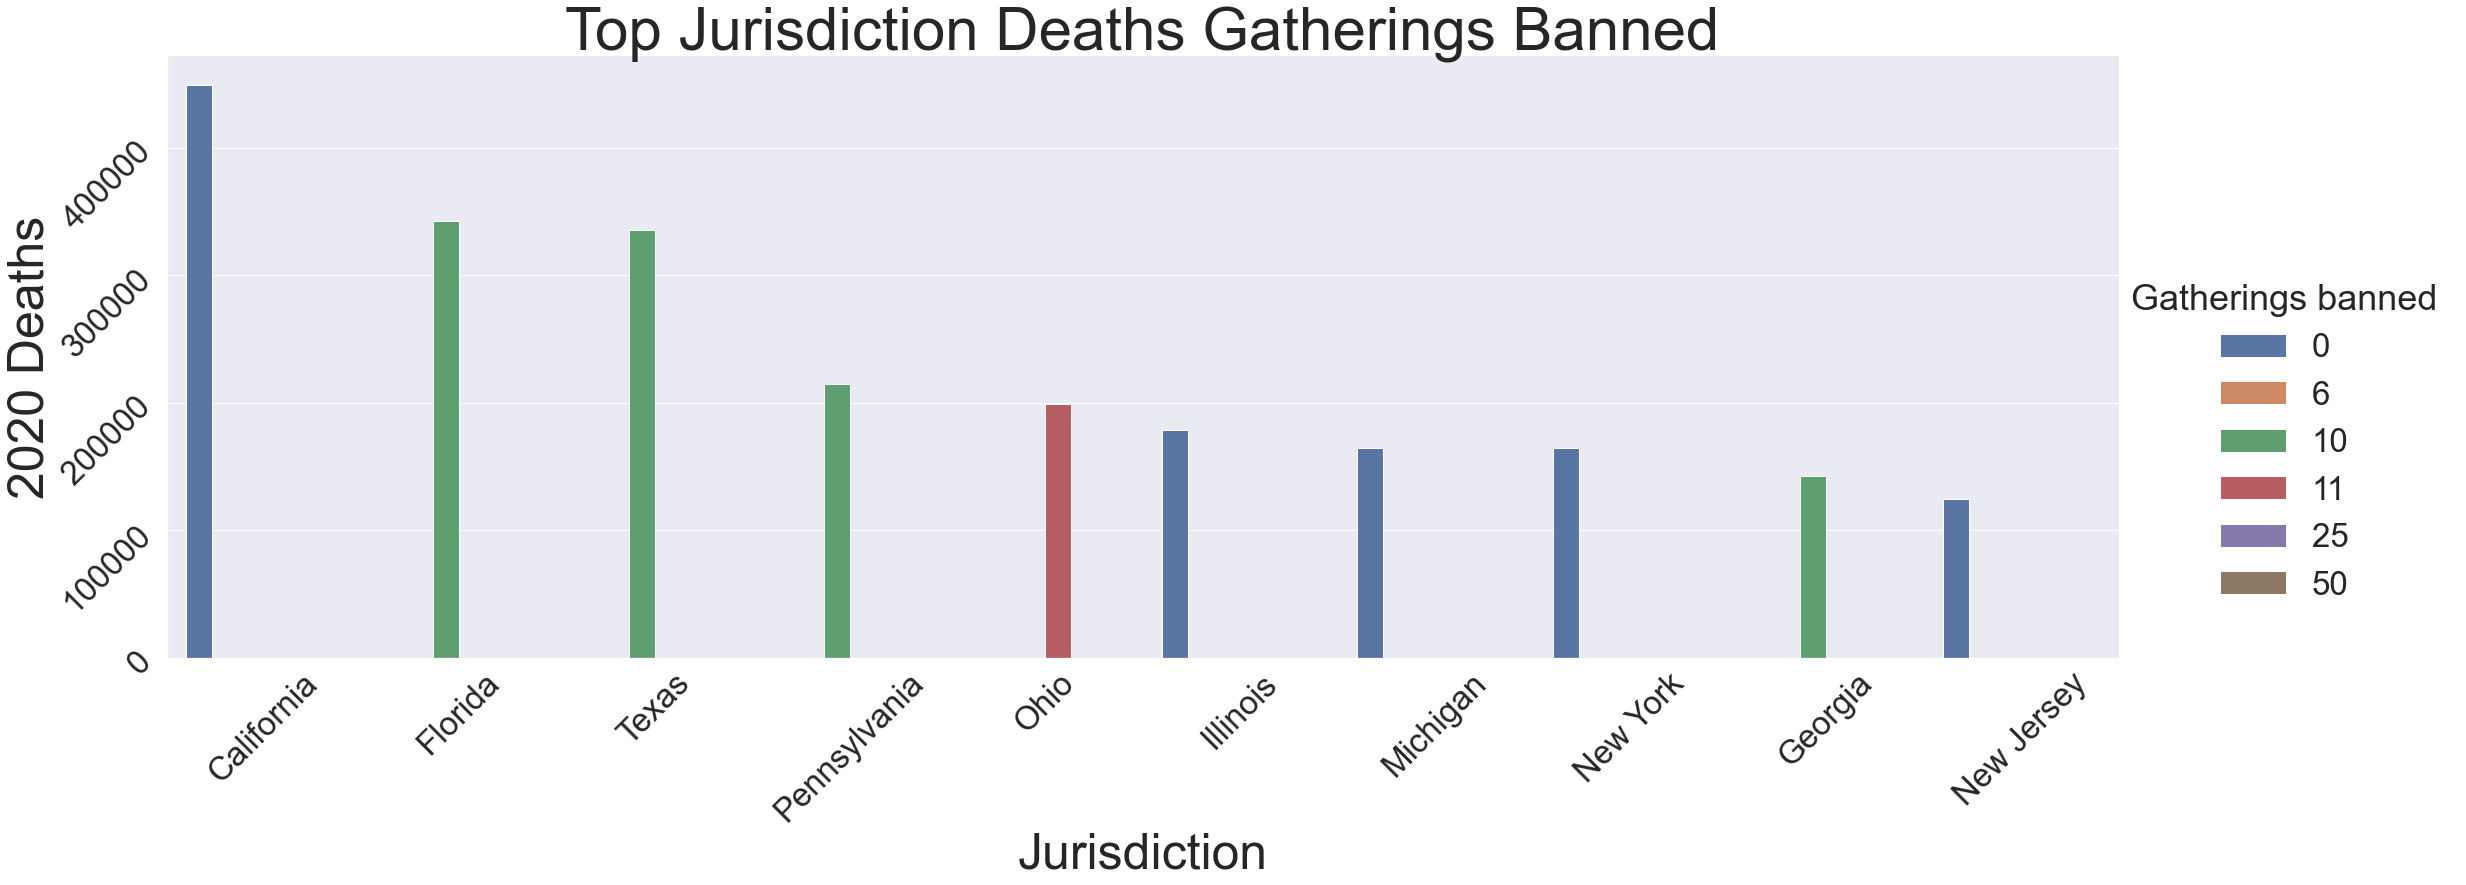

In [85]:
sns.catplot(x='Jurisdiction', y='2020 Deaths', hue='Gatherings banned', kind='bar', height=10, aspect=3, data=df_mostDeaths2020.head(10))
plt.title('Top Jurisdiction Deaths Gatherings Banned', size=60)
plt.xlabel('Jurisdiction', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

The top jurisdiction deaths gathering banned plot shows that California had the most deaths and also had all gatherings banned. Florida had the second most deaths and had groups of 10 gatherings banned.

Lets plot gatherings banned by deaths per capita.

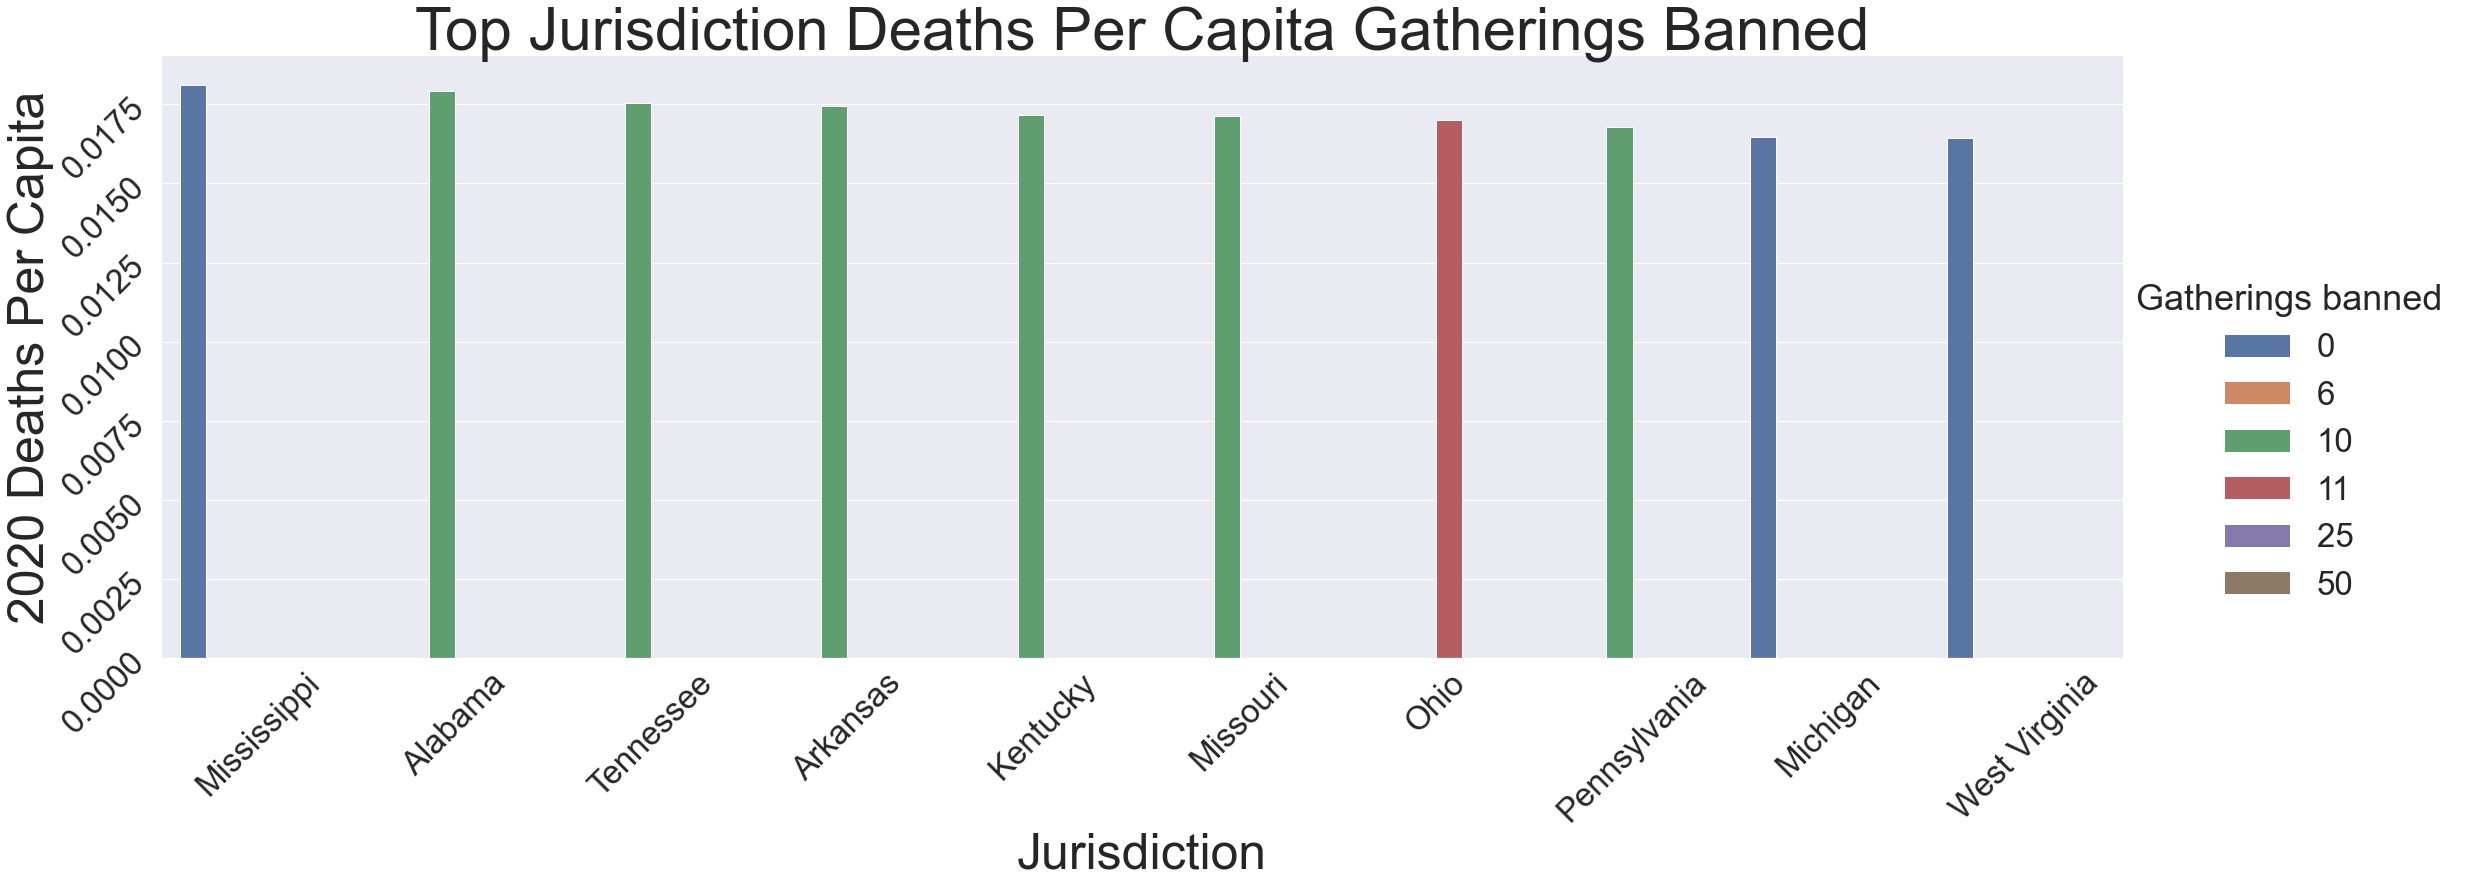

In [86]:
sns.catplot(x='Jurisdiction', y='DeathsPerCapita', hue='Gatherings banned', kind='bar', height=10, aspect=3, data=df_dpc_sorted.head(10))
plt.title('Top Jurisdiction Deaths Per Capita Gatherings Banned', size=60)
plt.xlabel('Jurisdiction', size=50)
plt.ylabel('2020 Deaths Per Capita', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the deaths per capita gatherings banned plot above, you can see that Mississippi had the highest deaths per capita rate and had all gatherings banned.

# Conclusion

Overall, from our computations, plots and analyses, we can come to the conclusion that the different lockdown levels did not have a significant effect on the death rates. 

One of our strangest findings was that states with less severe lockdowns also had the same deaths per capita rates as states with more severe lockdowns.

We found that a lot states with mask mandates had around the same amount of deaths and deaths per capita rate as states that didn't have a mask mandate.

